# Notebook - Gridworld - ValueIteration - withFunctions

[???INTRO: IN QUESTO PROGETTO ABBIAMO FATTO...]
[???AGGIUNGERE INDICE]

What we call a "gridworld" is, essentially, a grid of `Lx` columns and `Ly` rows. At each iteration the agent will be in a cell of this grid; the actions that it is allowed to do are:
- move to the right cell
- move to the left cell
- move to the cell above
- move to the cell below

An amount of cells equal to `Nblocks` is seen as walls (meaning that the agent cannot stay in those cells, nor can jump over them). A list of `goals` contains the coordinates of the cells that the agent aims to reach. Each goal-cell is associated with a reward, a value stored in the list `rewards_list`: when the agent succeeds in occupying a goal-cell it will get the associated reward.

Reached one of the goal-cell, the episode is over ("the game is over", but in a nice way because the agent won): the agent will not continue to play, so it will not aim to another goal-cell.

## Libraries

First of all we need to import the libraries and the files that we will need to execute the code. `PY_GW_VI_plot` is the file containing the functions useful to visually plot some information regarding the specific gridworld. `PY_GW_VI_tools` contains the functions that will be used to get information, manipulate and act on the gridworld.

In [1]:
import numpy as np
import PY_GW_VI_plot
import PY_GW_VI_tools
import time

## Example 1: Gridworld problem with one goal-cell

In this first example the grid contains just one goal-cell: the aim of the agent is to reach that cell, obtaining the reward that it carries. Let's define the parameters that describe the environment of the grid:

In [2]:
# width of the grid; height of the grid; amount of cells that are walls in the grid
Lx = 10 
Ly = 15
Nblocks = 40

# cells that are goals; amount of the rewards if the goals are reached
goal = [(9,9)]
rewards_list = [1]

# possible actions that the agent can do (i.e., how it moves in the grid).
# Observe that the way they are defined will make the computation of the new state easy
Actions = np.array([[1,0],[-1,0],[0,1],[0,-1]]) # respectively: right, left, up, down 

# the algorithm will stop after a certain amount of iterations max_n_of_iterations if it had not reached the
# desidered tolerance yet ( dist_2(V_(k+1) - V_(k)) < tolerance )
max_n_of_iterations = 300
tolerance = 0.001

# gamma is the discount factor, which expresses how far in the future we want your sum to contribute.
# The more gamma is high, the more forward-looking we are and take the future into account
gamma = 0.95

# probability that I take the action that maximises the V (V is the value of the policy).
# A value that is less than 1 means that with a probability 1 - p we will pick a random action (however,
# in the set of the random actions there is also the one that maximises the V)
p = 1

# random_flag=False means that the choice of the action is deterministic.
# Redundancy with p = 1, but the boolean value is safer to be used with comparisons (floats may give problems)
random_flag=False

Remark that we just set the amount `Nblocks` of the wall-cells, not their position in the grid.

Now that we have defined the parameters we can initialise the specific play ground that we call `World`, that is a concrete instance of a gridworld. The code will plot some visual images of the gridworld. A set of three images will display the gridworld:
- as it is
- with each cell containing its associated value of [???COSA, ESATTAMENTE?]
- with each cell containing the indication of the best action to choose for the following action

Our code will also print some information:
- whether we succeeded in having a value lower than `tolerance`
- at which iteration we got a value lower than `tolerance`

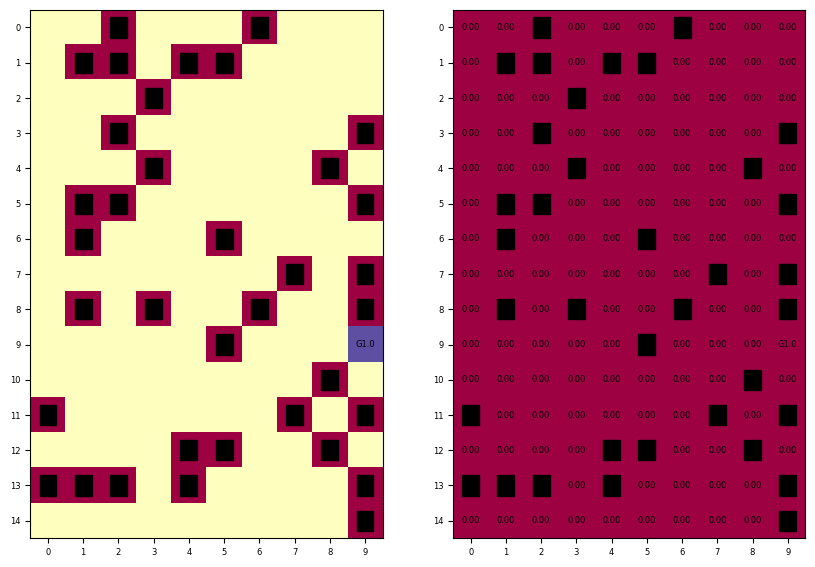

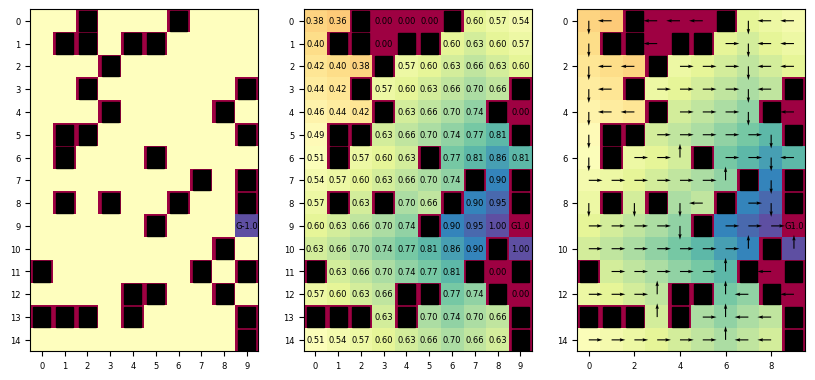

Yes, we converge w.r.t. our tolerance
Distance between V_21(S) and V_22(S) is: 0.0


In [3]:
# GRIDWORLD 1

# Build the world (and initial values)
World = PY_GW_VI_tools.new_world(Lx=Lx, Ly=Ly, Nblocks=Nblocks, goal=goal, rewards=rewards_list)
Values = np.zeros((Ly,Lx))

# Solve and plot
PY_GW_VI_plot.plot_world_values(World=World, Values=Values)
World, NewValues, Policy, result_info, num_iter = PY_GW_VI_tools.solve_grid_world(
    World = World,
    initial_values = Values,
    max_n_of_iterations = max_n_of_iterations,
    gamma = gamma,
    tolerance = tolerance,
    possible_actions = Actions,
    p = p,
    random_flag=random_flag)
PY_GW_VI_plot.plot_world_values_policy(World=World, Values=NewValues, Policy=Policy)
print( PY_GW_VI_tools.get_info_about_result(result_info = result_info) )

Due to how the functions are built, observe that the same code may give a different instance (the position of the `Nblocks` wall-cells may vary):

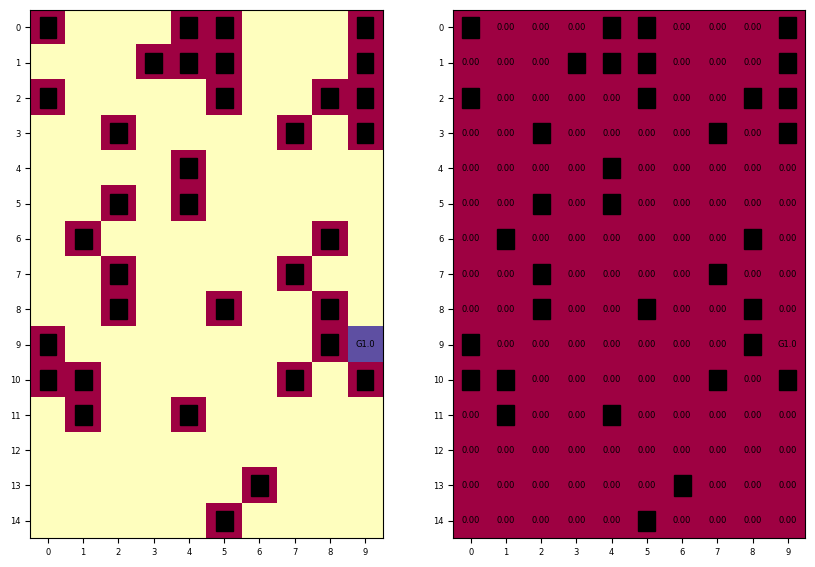

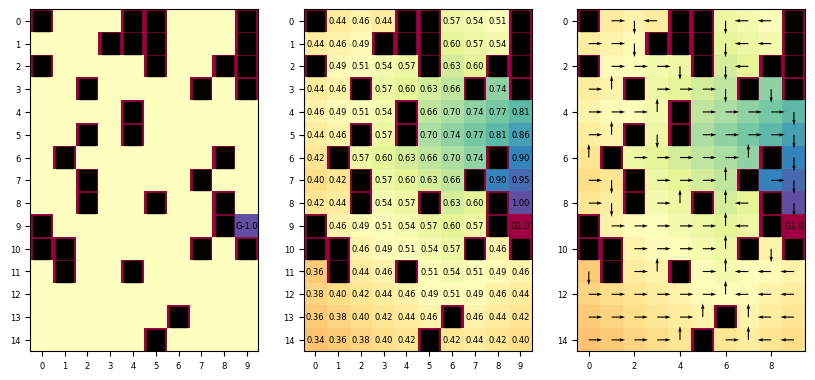

Yes, we converge w.r.t. our tolerance
Distance between V_22(S) and V_23(S) is: 0.0


In [4]:
# GRIDWORLD 2

# Build the world (and initial values)
World = PY_GW_VI_tools.new_world(Lx=Lx, Ly=Ly, Nblocks=Nblocks, goal=goal, rewards=rewards_list)
Values = np.zeros((Ly,Lx))

# Solve and plot
PY_GW_VI_plot.plot_world_values(World=World, Values=Values)
World, NewValues, Policy, result_info, num_iter = PY_GW_VI_tools.solve_grid_world(
    World = World,
    initial_values = Values,
    max_n_of_iterations = max_n_of_iterations,
    gamma = gamma,
    tolerance = tolerance,
    possible_actions = Actions,
    p = p,
    random_flag=random_flag)
PY_GW_VI_plot.plot_world_values_policy(World=World, Values=NewValues, Policy=Policy)
print( PY_GW_VI_tools.get_info_about_result(result_info = result_info) )

### Tests

Let's now play a little with the code. We will observe what happens changing the values of:
- `max_n_of_iterations` (1)
- `gamma` (2)

and we will investigate:
- an average time to fall below the tolerance (3)
- number of iterations to converge (4)

#### (1) Changing `max_n_of_iterations`

max_n_of_iterations =  2


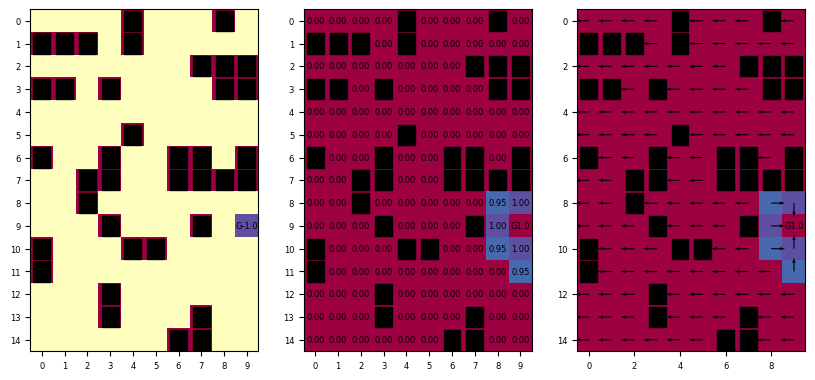

No, we stop before reaching the tolerance threshold
Distance between V_2(S) and V_3(S) is: 0.13435028842544403



max_n_of_iterations =  4


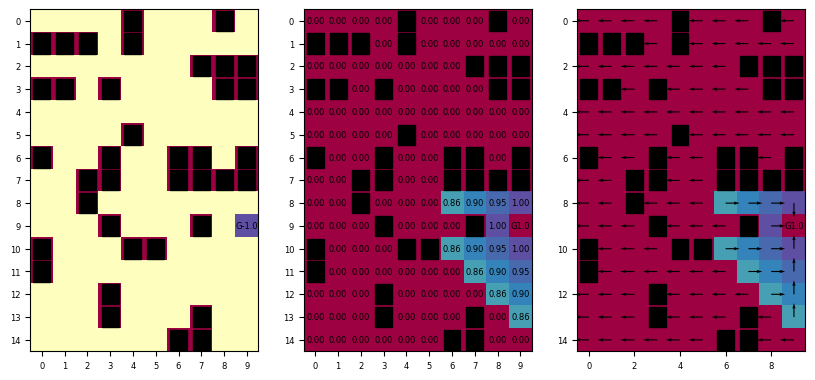

No, we stop before reaching the tolerance threshold
Distance between V_4(S) and V_5(S) is: 0.1565345425803306



max_n_of_iterations =  6


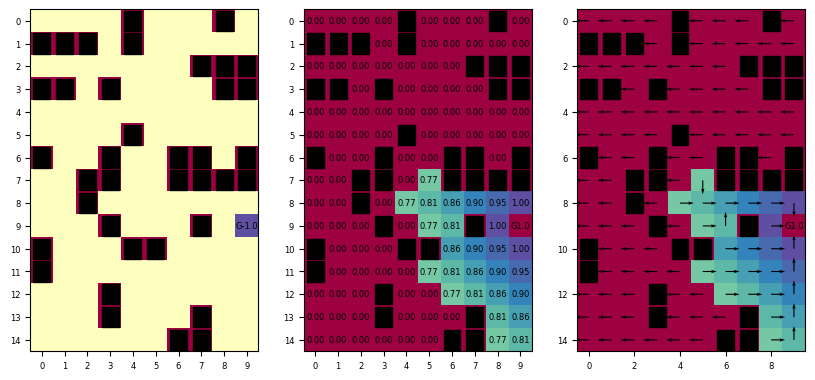

No, we stop before reaching the tolerance threshold
Distance between V_6(S) and V_7(S) is: 0.15475618749999998



max_n_of_iterations =  8


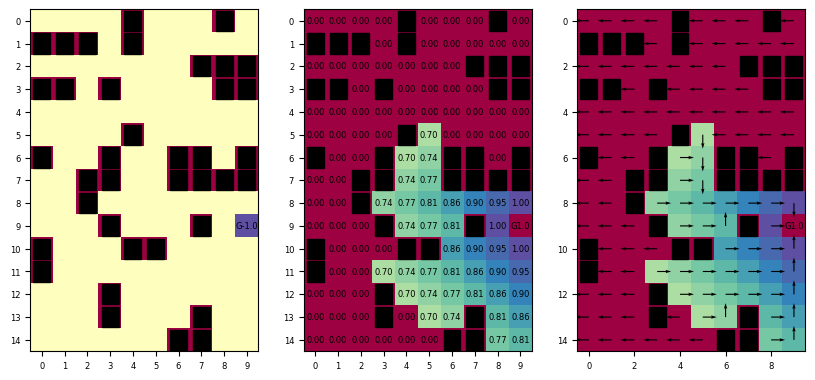

No, we stop before reaching the tolerance threshold
Distance between V_8(S) and V_9(S) is: 0.12749836327257033



max_n_of_iterations =  10


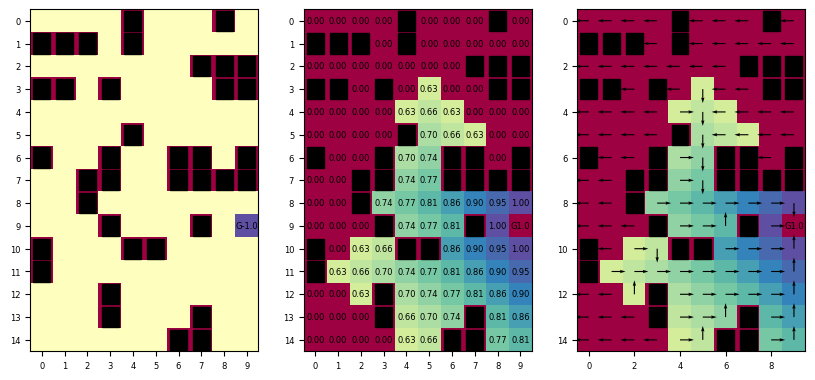

No, we stop before reaching the tolerance threshold
Distance between V_10(S) and V_11(S) is: 0.14554986654444232



max_n_of_iterations =  12


KeyboardInterrupt: 

In [5]:
# (1) Changing max_n_of_iterations: everything else, position of the Nblocks included, remains fixed


# Build the world (and initial values)
World = PY_GW_VI_tools.new_world(Lx=Lx, Ly=Ly, Nblocks=Nblocks, goal=goal, rewards=rewards_list)
Values = np.zeros((Ly,Lx))

iterations_for = 10

for n in range(1, iterations_for + 1):
    print("max_n_of_iterations = ", n*2)
    World, NewValues, Policy, result_info, num_iter = PY_GW_VI_tools.solve_grid_world(
        World = World,
        initial_values = Values,
        max_n_of_iterations = n*2,
        gamma = gamma,
        tolerance = tolerance,
        possible_actions = Actions,
        p = p,
        random_flag=random_flag)
    PY_GW_VI_plot.plot_world_values_policy(World=World, Values=NewValues, Policy=Policy)
    print(PY_GW_VI_tools.get_info_about_result(result_info = result_info))
    print("\n\n")

Observe that the more high the number of iteration, the more far from the goal-cell we have the optimal indications to reach the aim. Somehow, the indications propagates from the goal-cell to the rest of the grid.

#### (2) Changing `gamma`

gamma =  0.1


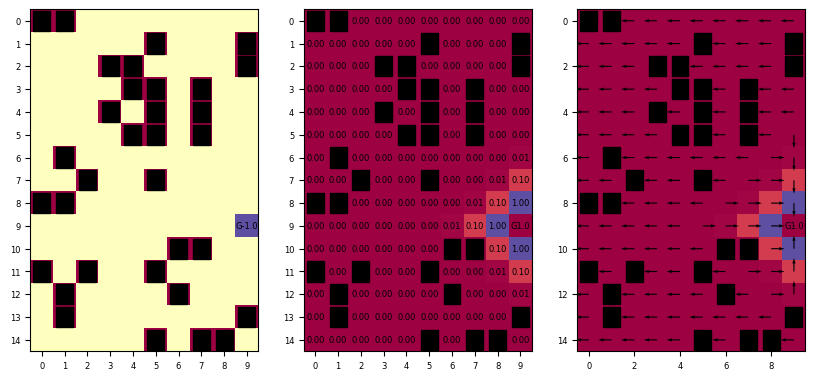

Yes, we converge w.r.t. our tolerance
Distance between V_3(S) and V_4(S) is: 0.0002160246899469287



gamma =  0.2


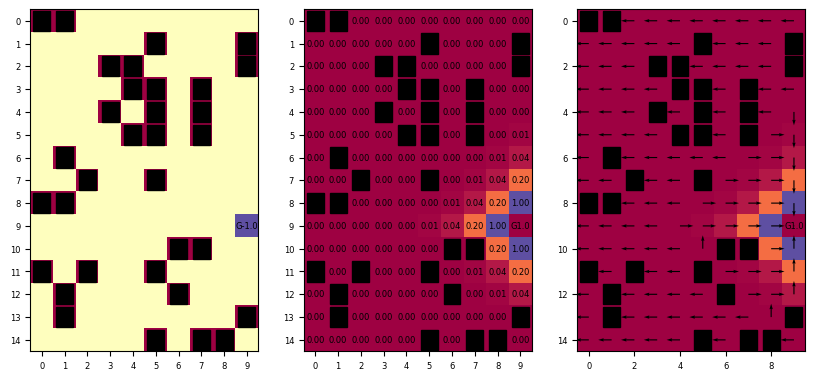

Yes, we converge w.r.t. our tolerance
Distance between V_4(S) and V_5(S) is: 0.00041311822359545793



gamma =  0.30000000000000004


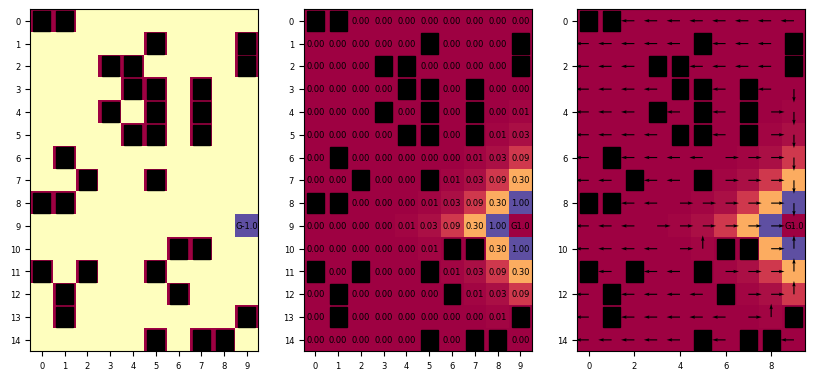

Yes, we converge w.r.t. our tolerance
Distance between V_5(S) and V_6(S) is: 0.000524939996571037



gamma =  0.4


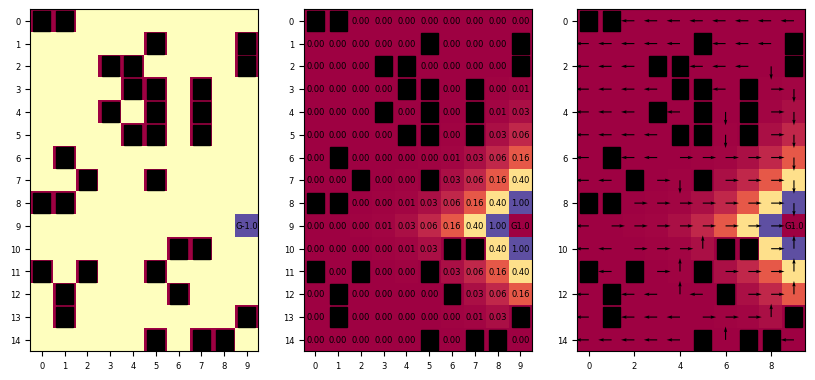

Yes, we converge w.r.t. our tolerance
Distance between V_7(S) and V_8(S) is: 0.0004436808174051855



gamma =  0.5


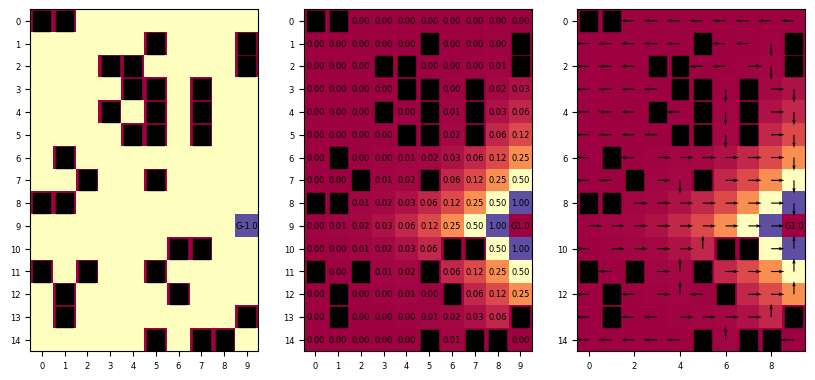

Yes, we converge w.r.t. our tolerance
Distance between V_8(S) and V_9(S) is: 0.0009568319307746789



gamma =  0.6000000000000001


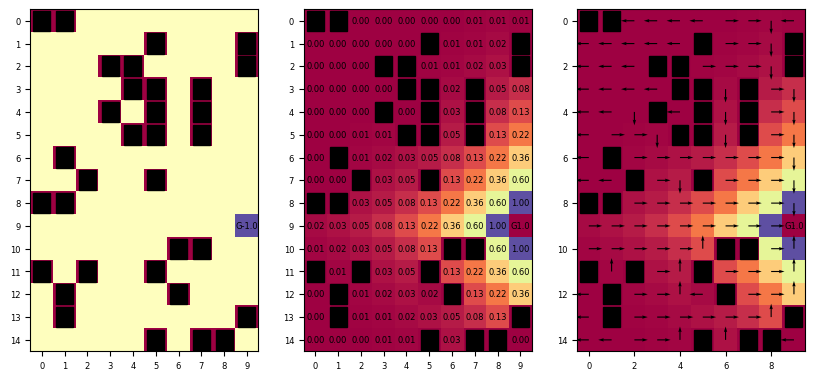

Yes, we converge w.r.t. our tolerance
Distance between V_11(S) and V_12(S) is: 0.0005924451115892905



gamma =  0.7000000000000001


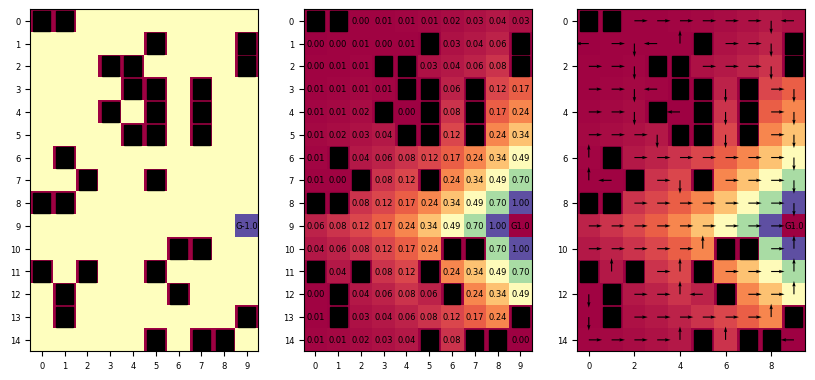

Yes, we converge w.r.t. our tolerance
Distance between V_15(S) and V_16(S) is: 0.0009495123019886012



gamma =  0.8


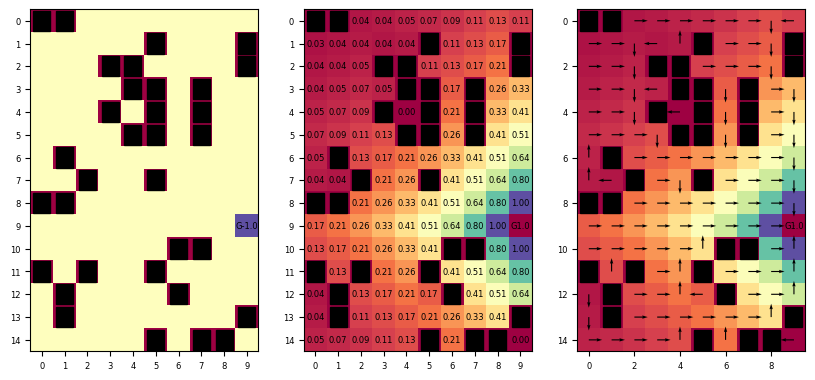

Yes, we converge w.r.t. our tolerance
Distance between V_17(S) and V_18(S) is: 0.0



gamma =  0.9


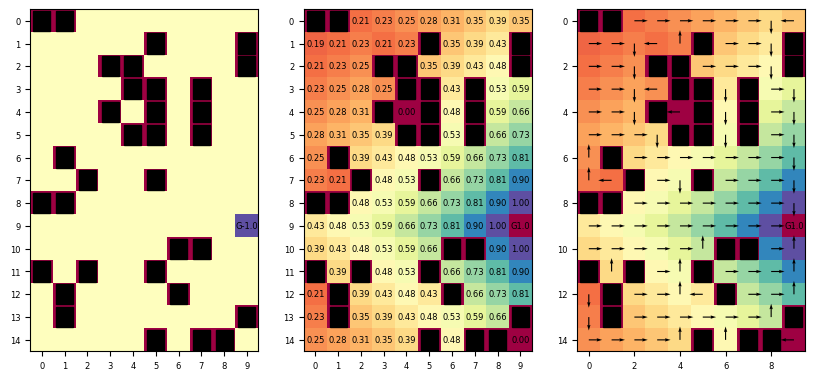

Yes, we converge w.r.t. our tolerance
Distance between V_17(S) and V_18(S) is: 0.0



gamma =  1.0


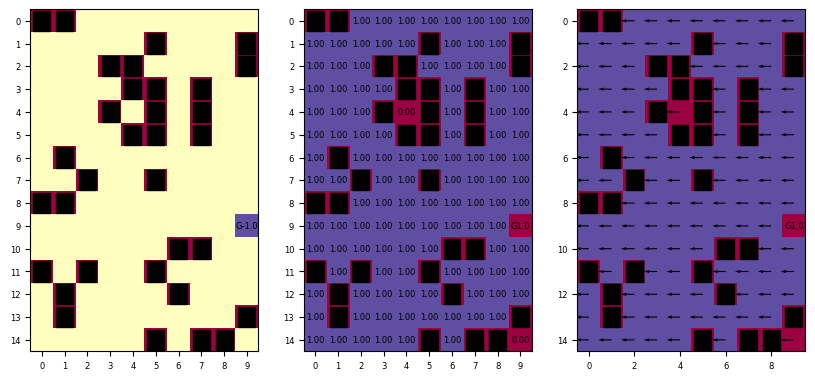

Yes, we converge w.r.t. our tolerance
Distance between V_17(S) and V_18(S) is: 0.0





In [ ]:
# (2) Changing gamma: everything else, position of the Nblocks included, remains fixed


# Build the world (and initial values)
World = PY_GW_VI_tools.new_world(Lx=Lx, Ly=Ly, Nblocks=Nblocks, goal=goal, rewards=rewards_list)
Values = np.zeros((Ly,Lx))

iterations_for = 10
max_n_of_iterations = 300

for n in range(1, iterations_for + 1):
    print("gamma = ", 0.1*n)
    World, NewValues, Policy, result_info, num_iter = PY_GW_VI_tools.solve_grid_world(
        World = World,
        initial_values = Values,
        max_n_of_iterations = max_n_of_iterations,
        gamma = 0.1*n,
        tolerance = tolerance,
        possible_actions = Actions,
        p = p,
        random_flag=random_flag)
    PY_GW_VI_plot.plot_world_values_policy(World=World, Values=NewValues, Policy=Policy)
    print(PY_GW_VI_tools.get_info_about_result(result_info = result_info))
    print("\n\n")

Here we observe that the less the value of gamma, the less the amount of iterations needed for convergence but, on the other hand, somehow the worse the result. As a matter of fact, starting from some cells we will not be able to reach the goal-cell following the provided indications or the path will not be optimised.

The more the value of gamma (except for `gamma = 1` ) the more high the number of iterations for convergence but the more optimised the result on the grid. [???AGGIUNGERE QUESTIONE SU GAMMA, perché no 1?]

#### (3) An average time to fall below `tolerance`

The generation of the gridworld is partially random since the amount `Nblock` is fixed but the position of the walls is not. Here we will investigate an average of the time to reach the convergence as a function of `Lx` and `Ly` (the time required to do the plots will not be considered). The value of `max_n_of_iterations` is important to set a stop condition to the algorithm: we assume that the value we chose is high enough and that the convergence happens before. However, this is not sure and one may play with the variables and the code to see how many times the convergences is reached and how many times it is not. A high value of `num_tests` helps to obtain a better estimation.

In [ ]:
# (3) An average time to fall below the tolerance

def function_time(Lx, Ly, Nblocks, goal, rewards_list, max_n_of_iterations, gamma, p, random_flag, num_tests, tolerance = 0.001):

    times = []

    for i in range(1, num_tests + 1):

        # Build the world (and initial values)
        World = PY_GW_VI_tools.new_world(Lx=Lx, Ly=Ly, Nblocks=Nblocks, goal=goal, rewards=rewards_list)
        Values = np.zeros((Ly,Lx))

        start_time = time.time()

        # Solve and plot
        World, NewValues, Policy, result_info, num_iter = PY_GW_VI_tools.solve_grid_world(
            World = World,
            initial_values = Values,
            max_n_of_iterations = max_n_of_iterations,
            gamma = gamma,
            tolerance = tolerance,
            possible_actions = Actions,
            p = p,
            random_flag=random_flag)
    
        end_time = time.time()
        times.append(end_time - start_time)

    average_time = sum(times) / num_tests
    std_deviation = np.std(times)
    print(f"Lx = {Lx}; Ly = {Ly}")
    print(f"max_n_of_iterations = {max_n_of_iterations}; {num_tests} tests")
    print(f"Average time: {average_time} seconds")
    print(f"Standard deviation: {std_deviation} seconds")

function_time(Lx=10, Ly=15, Nblocks=Nblocks, goal=goal,
              rewards_list=rewards_list, max_n_of_iterations=1000, gamma=gamma,
              p=p, random_flag=random_flag, num_tests=50)
print("\n")
function_time(Lx=15, Ly=15, Nblocks=Nblocks, goal=goal,
              rewards_list=rewards_list, max_n_of_iterations=1000, gamma=gamma,
              p=p, random_flag=random_flag, num_tests=50)
print("\n")
function_time(Lx=20, Ly=20, Nblocks=Nblocks, goal=goal,
              rewards_list=rewards_list, max_n_of_iterations=1000, gamma=gamma,
              p=p, random_flag=random_flag, num_tests=50)
print("\n")
function_time(Lx=25, Ly=25, Nblocks=Nblocks, goal=goal,
              rewards_list=rewards_list, max_n_of_iterations=1000, gamma=gamma,
              p=p, random_flag=random_flag, num_tests=50)
print("\n")

Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average time: 0.06503113269805909 seconds
Standard deviation: 0.017950901864097743 seconds


Lx = 15; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average time: 0.09902510166168213 seconds
Standard deviation: 0.009576618950846971 seconds


Lx = 20; Ly = 20
max_n_of_iterations = 1000; 50 tests
Average time: 0.21010721683502198 seconds
Standard deviation: 0.010424513975817095 seconds


Lx = 25; Ly = 25
max_n_of_iterations = 1000; 50 tests
Average time: 0.5527395820617675 seconds
Standard deviation: 0.03678869357726006 seconds




#### (4) Number of iterations to converge

Let's study the average amount of iterations needed to get the convergence (so to fall below the requested tolerance). Similarly to the case before, we assume to have a value of `max_n_of_iterations` that is high enough and will not be reached:

In [ ]:
# (4) Number of iterations to converge

def function_convergence(Lx, Ly, Nblocks, goal, rewards_list, max_n_of_iterations, gamma, p, random_flag, num_tests, tolerance = 0.001):

    iterations_convergence = []

    for i in range(1, num_tests + 1):

        # Build the world (and initial values)
        World = PY_GW_VI_tools.new_world(Lx=Lx, Ly=Ly, Nblocks=Nblocks, goal=goal, rewards=rewards_list)
        Values = np.zeros((Ly,Lx))

        # Solve
        World, NewValues, Policy, result_info, num_iter = PY_GW_VI_tools.solve_grid_world(
            World = World,
            initial_values = Values,
            max_n_of_iterations = max_n_of_iterations,
            gamma = gamma,
            tolerance = tolerance,
            possible_actions = Actions,
            p = p,
            random_flag=random_flag)
        
        iterations_convergence.append(num_iter)

    average_iter = sum(iterations_convergence) / num_tests
    std_deviation = np.std(iterations_convergence)
    print(f"Lx = {Lx}; Ly = {Ly}")
    print(f"max_n_of_iterations = {max_n_of_iterations}; {num_tests} tests")
    print(f"Average amount of iterations: {average_iter}")
    print(f"Standard deviation: {std_deviation}")

function_convergence(Lx=10, Ly=15, Nblocks=Nblocks, goal=goal, rewards_list=rewards_list, max_n_of_iterations=1000, gamma=gamma, p=p, random_flag=random_flag, num_tests=50)
print("\n")
function_convergence(Lx=15, Ly=15, Nblocks=Nblocks, goal=goal, rewards_list=rewards_list, max_n_of_iterations=1000, gamma=gamma, p=p, random_flag=random_flag, num_tests=50)
print("\n")
function_convergence(Lx=20, Ly=20, Nblocks=Nblocks, goal=goal, rewards_list=rewards_list, max_n_of_iterations=1000, gamma=gamma, p=p, random_flag=random_flag, num_tests=50)
print("\n")
function_convergence(Lx=25, Ly=25, Nblocks=Nblocks, goal=goal, rewards_list=rewards_list, max_n_of_iterations=1000, gamma=gamma, p=p, random_flag=random_flag, num_tests=50)
print("\n")

Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average amount of iterations: 19.26
Standard deviation: 3.279085238294363


Lx = 15; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average amount of iterations: 19.14
Standard deviation: 0.9167333309092671


Lx = 20; Ly = 20
max_n_of_iterations = 1000; 50 tests
Average amount of iterations: 21.04
Standard deviation: 0.8475848040166837


Lx = 25; Ly = 25
max_n_of_iterations = 1000; 50 tests
Average amount of iterations: 30.92
Standard deviation: 0.2712931993250107




## Example 2: Gridworld problem with multiple goal-cells

In this second example the grid contains more than one goal-cell: the aim of the agent is to reach one of those cells, obtaining the reward that it carries. Remember that the game is over when the agent succeeds in reaching a goal-cell. Depending on some factors (included the position of the agent) the target goal-cell will be different. 

Let's first define, again, the parameters that describe the environment of the grid:

In [ ]:
# width of the grid; height of the grid; amount of cells that are walls in the grid
Lx = 10
Ly = 15
Nblocks = 40

# cells that are goals; amount of the rewards if the goals are reached.
# Remark that here we have two goals, and the rewards_list is therefore composed by two values
goal = [(13,8),(3,2)]
rewards_list = [10,1]

# the algorithm will stop after a certain amount of iterations max_n_of_iterations if it had not reached the
# desidered tolerance yet ( dist_2(V_(k+1) - V_(k)) < tolerance )
max_n_of_iterations = 300
tolerance = 0.001

# gamma is the discount factor, which expresses how far in the future we want your sum to contribute.
# The more gamma is high, the more forward-looking we are and take the future into account
gamma = 0.95

# probability that I take the action that maximises the V (V is the value of the policy).
# A value that is less than 1 means that with a probability 1 - p we will pick a random action (however,
# in the set of the random actions there is also the one that maximises the V)
p = 1

# random_flag=False means that the choice of the action is deterministic.
# Redundancy with p = 1, but the boolean value is safer to be used with comparisons (floats may give problems)
random_flag=False

Now we can create an instance of a gridworld:

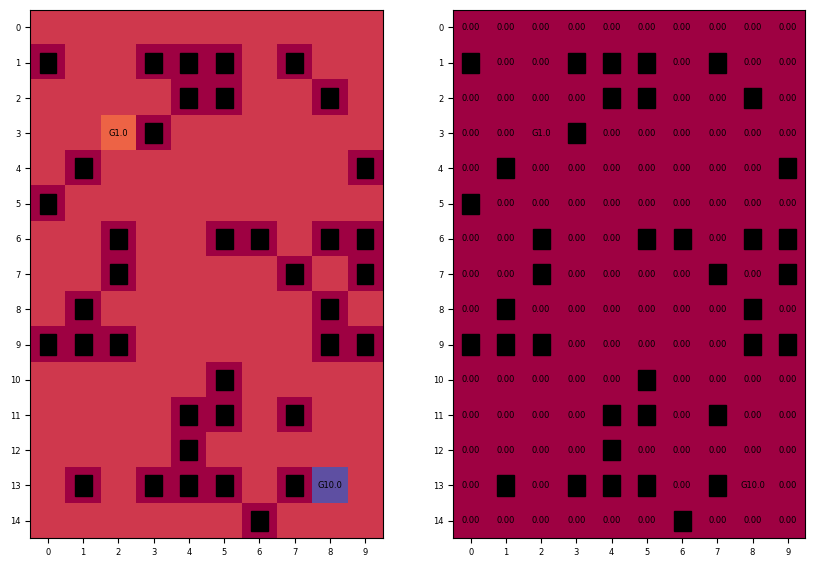

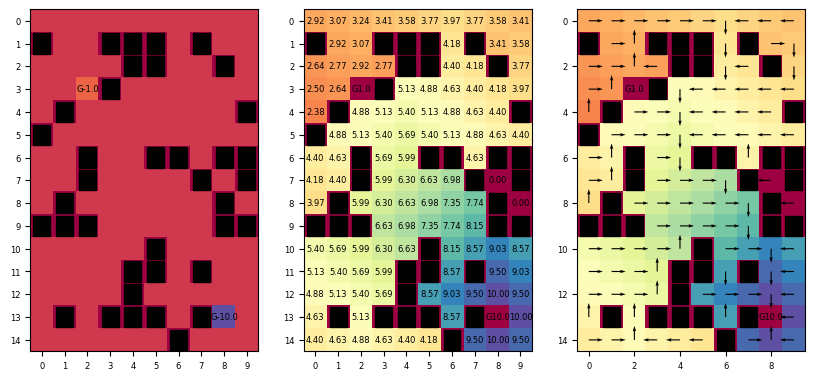

Yes, we converge w.r.t. our tolerance
Distance between V_29(S) and V_30(S) is: 0.0


In [ ]:
# Build the world (and initial values)
World = PY_GW_VI_tools.new_world(Lx=Lx, Ly=Ly, Nblocks=Nblocks, goal=goal, rewards=rewards_list)
Values = np.zeros((Ly,Lx))

# Solve and plot
PY_GW_VI_plot.plot_world_values(World=World, Values=Values)
World, NewValues, Policy, result_info, num_iter = PY_GW_VI_tools.solve_grid_world(
    World = World,
    initial_values = Values,
    max_n_of_iterations = max_n_of_iterations,
    gamma = gamma,
    tolerance = tolerance,
    possible_actions = Actions,
    p = p,
    random_flag=random_flag)
PY_GW_VI_plot.plot_world_values_policy(World=World, Values=NewValues, Policy=Policy)
print( PY_GW_VI_tools.get_info_about_result(result_info = result_info) )

We can clearly see that two goal-cells have been generated and each on is associated to a certain reward. Observe that, if not forced by some wall-cells, the agent will aim to the goal-cell that carries the higher reward.

We will investigate more in detail the situation in the next paragraph.

### Tests - 2 goal-cells

Let's now play a little with the code. We will observe what happens changing the values of:
- `max_n_of_iterations` (1)
- `gamma` (2)

and we will investigate:
- an average time to fall below the tolerance (3)
- number of iterations to converge (4)

having 2 goal-cells.

#### (1) Changing `max_n_of_iterations`

max_n_of_iterations =  2


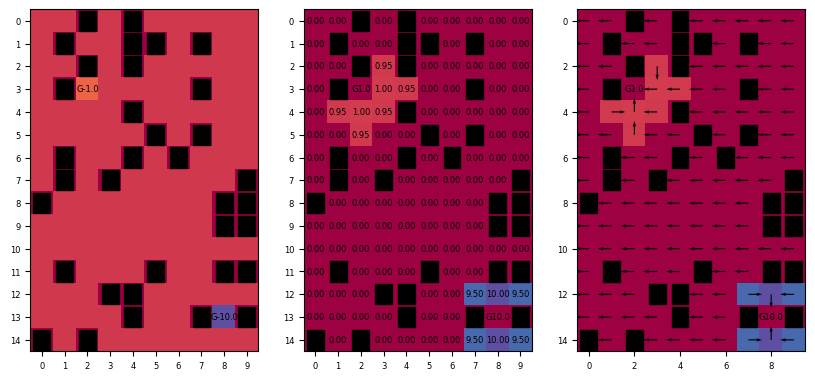

No, we stop before reaching the tolerance threshold
Distance between V_2(S) and V_3(S) is: 1.5610092888897233



max_n_of_iterations =  4


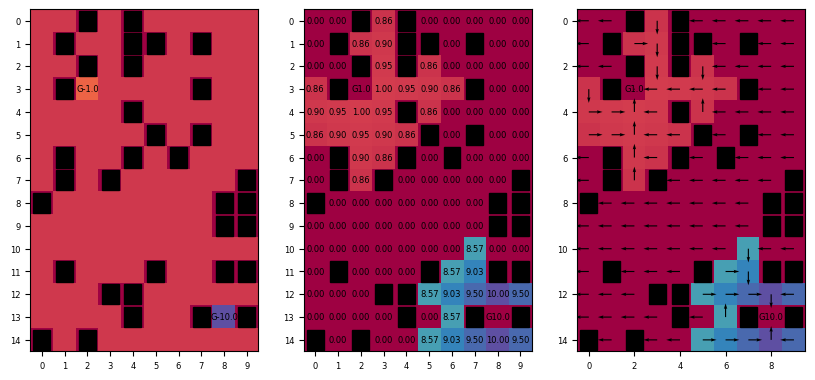

No, we stop before reaching the tolerance threshold
Distance between V_4(S) and V_5(S) is: 1.5809213858142979



max_n_of_iterations =  6


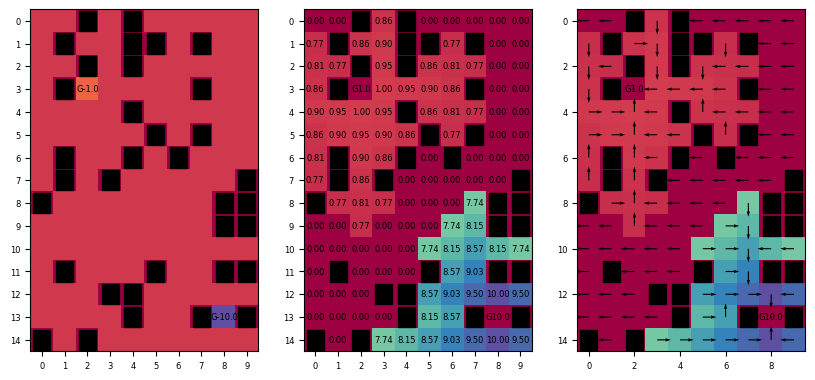

No, we stop before reaching the tolerance threshold
Distance between V_6(S) and V_7(S) is: 1.4267815506974038



max_n_of_iterations =  8


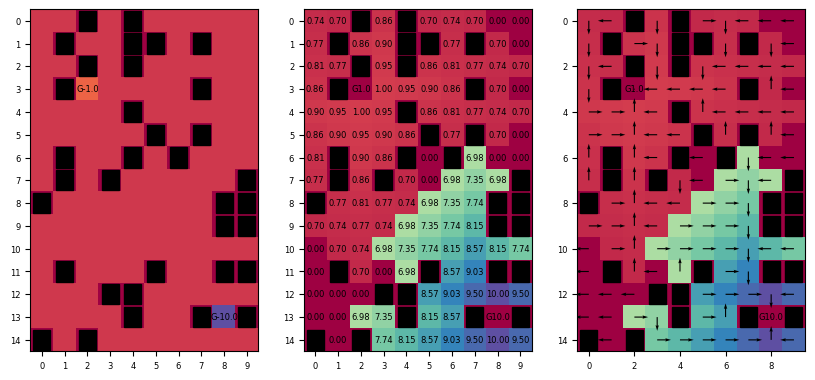

No, we stop before reaching the tolerance threshold
Distance between V_8(S) and V_9(S) is: 1.6247914390095533



max_n_of_iterations =  10


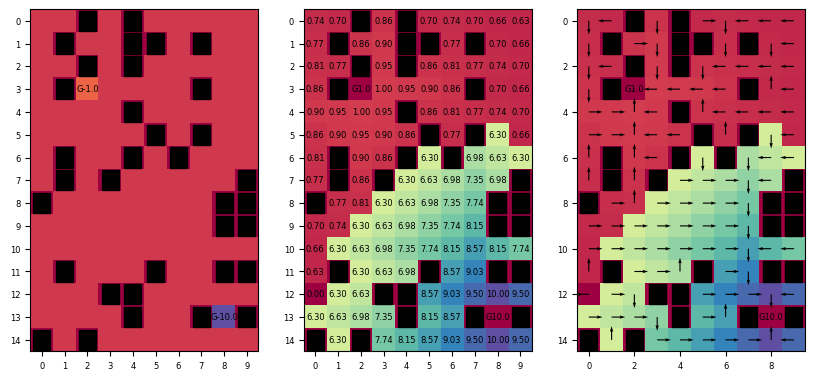

No, we stop before reaching the tolerance threshold
Distance between V_10(S) and V_11(S) is: 1.604496224321169



max_n_of_iterations =  12


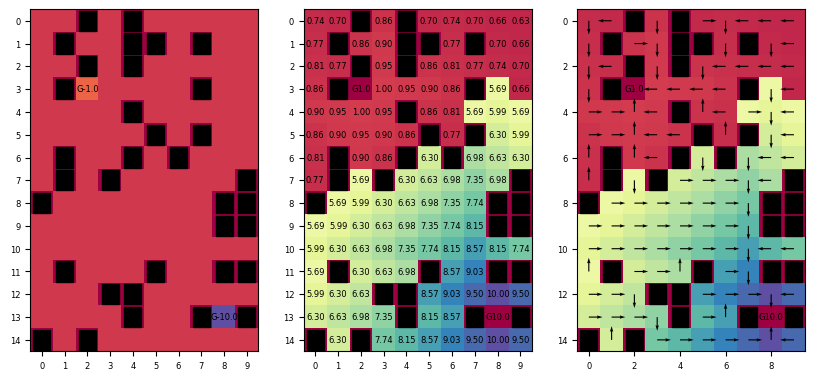

No, we stop before reaching the tolerance threshold
Distance between V_12(S) and V_13(S) is: 1.07052990810613



max_n_of_iterations =  14


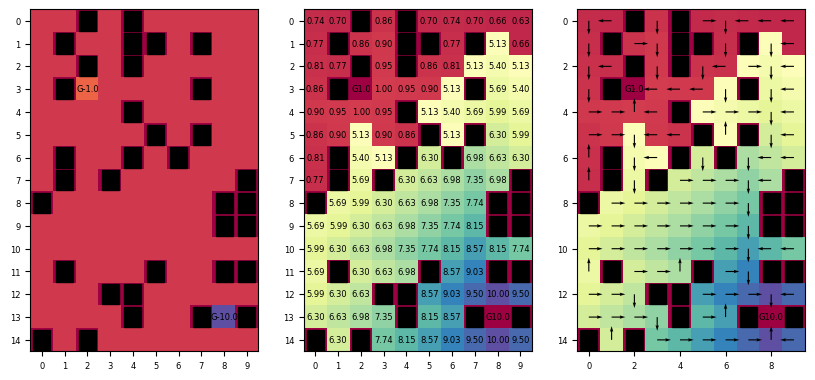

No, we stop before reaching the tolerance threshold
Distance between V_14(S) and V_15(S) is: 0.9990247435877638



max_n_of_iterations =  16


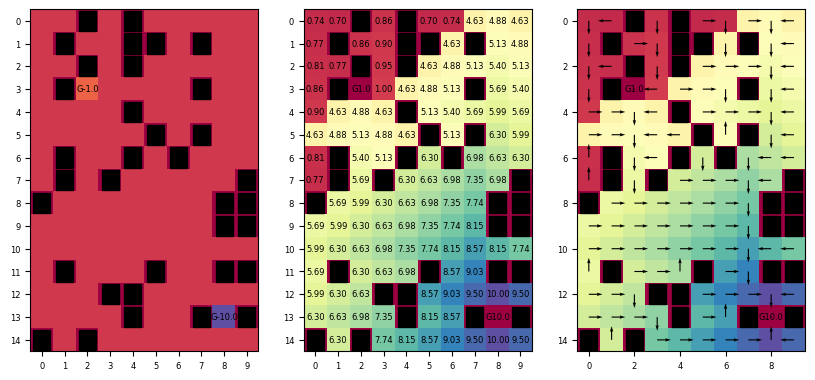

No, we stop before reaching the tolerance threshold
Distance between V_16(S) and V_17(S) is: 0.9304144610380589



max_n_of_iterations =  18


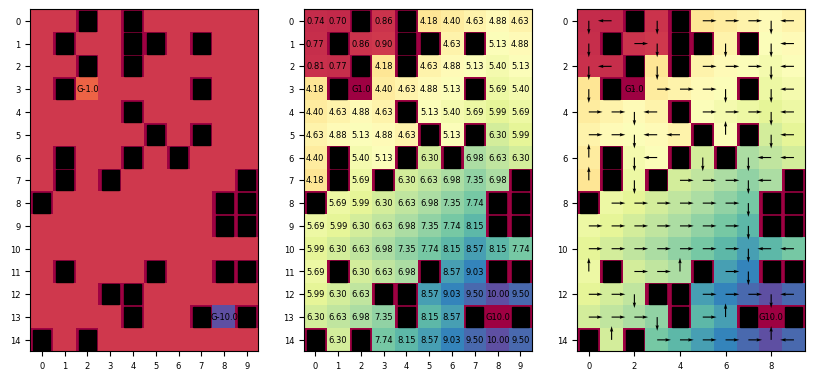

No, we stop before reaching the tolerance threshold
Distance between V_18(S) and V_19(S) is: 0.5491168272472498



max_n_of_iterations =  20


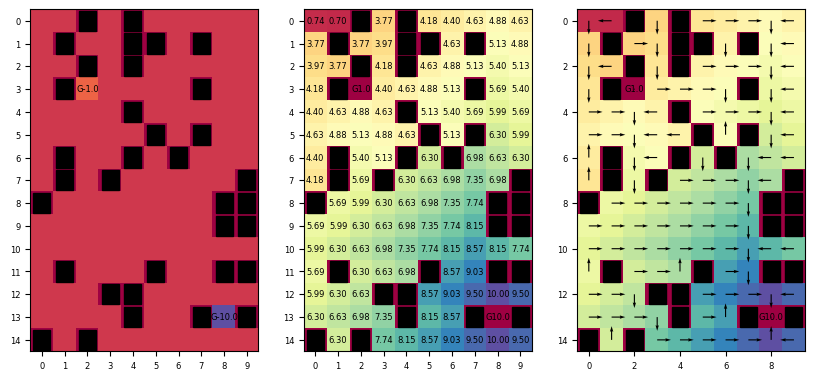

No, we stop before reaching the tolerance threshold
Distance between V_20(S) and V_21(S) is: 0.48308074843154575



max_n_of_iterations =  22


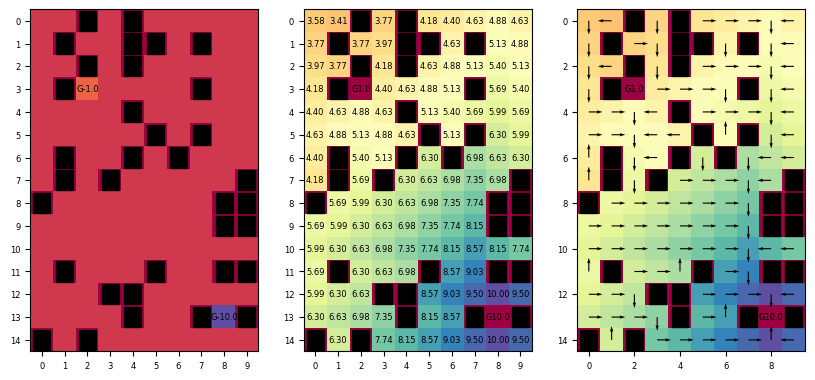

No, we stop before reaching the tolerance threshold
Distance between V_22(S) and V_23(S) is: 0.22104840199994574



max_n_of_iterations =  24


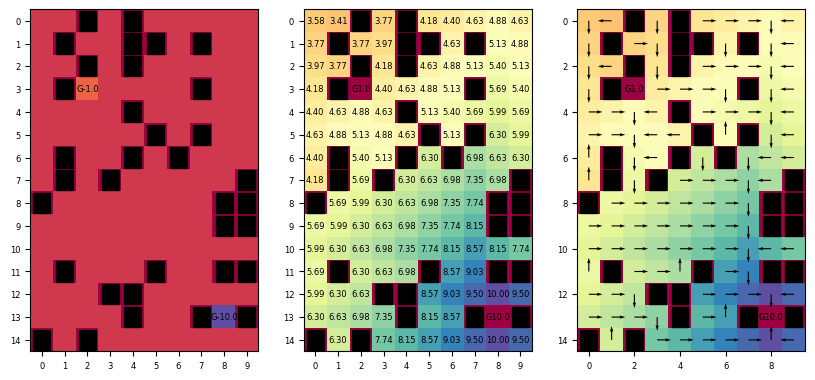

Yes, we converge w.r.t. our tolerance
Distance between V_22(S) and V_23(S) is: 0.0



max_n_of_iterations =  26


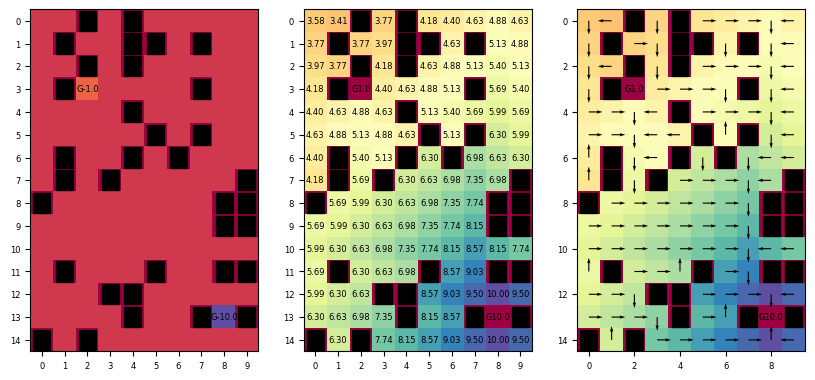

Yes, we converge w.r.t. our tolerance
Distance between V_22(S) and V_23(S) is: 0.0





In [ ]:
# (1) Changing max_n_of_iterations: everything else, position of the Nblocks included, remains fixed


# Build the world (and initial values)
World = PY_GW_VI_tools.new_world(Lx=Lx, Ly=Ly, Nblocks=Nblocks, goal=goal, rewards=rewards_list)
Values = np.zeros((Ly,Lx))

iterations_for = 13

for n in range(1, iterations_for + 1):
    print("max_n_of_iterations = ", n*2)
    World, NewValues, Policy, result_info, num_iter = PY_GW_VI_tools.solve_grid_world(
        World = World,
        initial_values = Values,
        max_n_of_iterations = n*2,
        gamma = gamma,
        tolerance = tolerance,
        possible_actions = Actions,
        p = p,
        random_flag=random_flag)
    PY_GW_VI_plot.plot_world_values_policy(World=World, Values=NewValues, Policy=Policy)
    print(PY_GW_VI_tools.get_info_about_result(result_info = result_info))
    print("\n\n")

A curious thing happens in this case. Each goal-cell may be considered "as a source of heat": at each iteration the "effects of the warmth" reach a greater radius of influence. Before intersecting, it is as if in a specific state the agent knew nothing of the existence of the other sources and it will follow the path that leads to the closer goal-cell (if the "warmth" coming from it at a certain iteration had already reached that position).

When the "warmth" coming from different goal-cells starts to intersect, so in a specific cell the agent will be aware of the existance of multiple goal-cells, the agent may decide to aim for a specific goal-cell rather than anotehr one.

But how does it decide which aim to pursue? See next paragraph!

#### (2) Changing `gamma`

gamma =  0.1


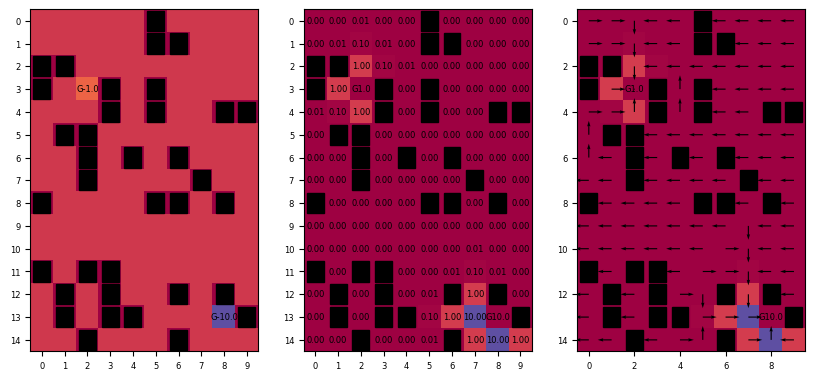

Yes, we converge w.r.t. our tolerance
Distance between V_4(S) and V_5(S) is: 0.00021679483388678804



gamma =  0.2


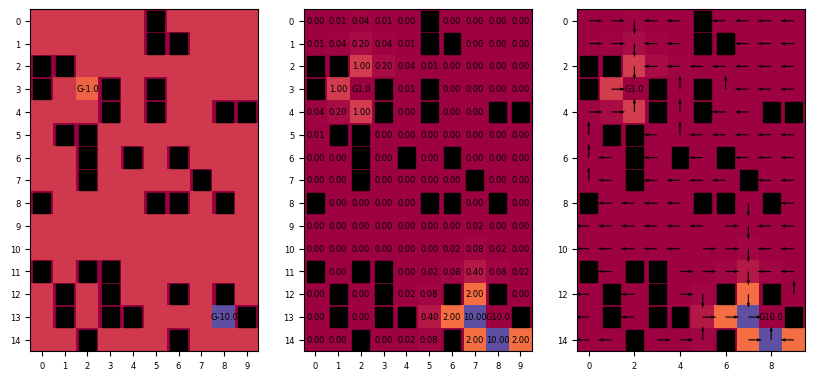

Yes, we converge w.r.t. our tolerance
Distance between V_5(S) and V_6(S) is: 0.0007413141484328132



gamma =  0.30000000000000004


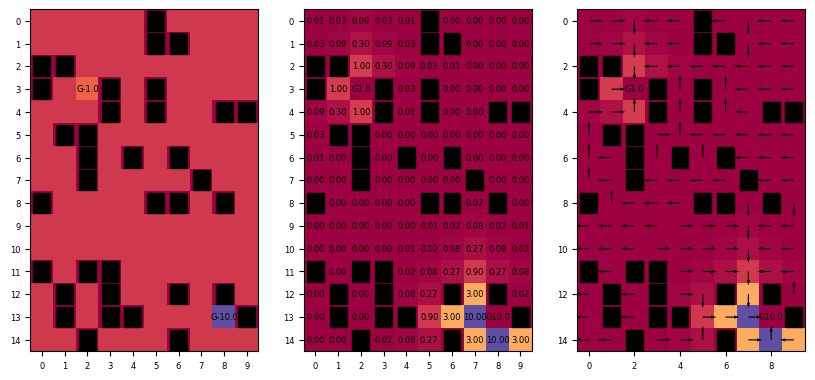

Yes, we converge w.r.t. our tolerance
Distance between V_7(S) and V_8(S) is: 0.00031389355106468844



gamma =  0.4


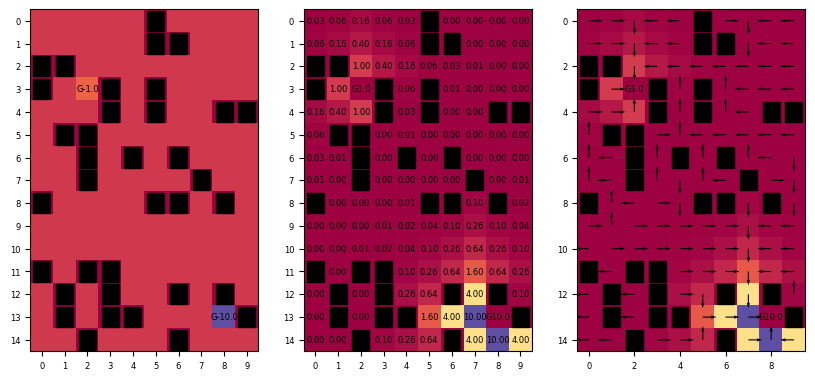

Yes, we converge w.r.t. our tolerance
Distance between V_9(S) and V_10(S) is: 0.0005264680010869926



gamma =  0.5


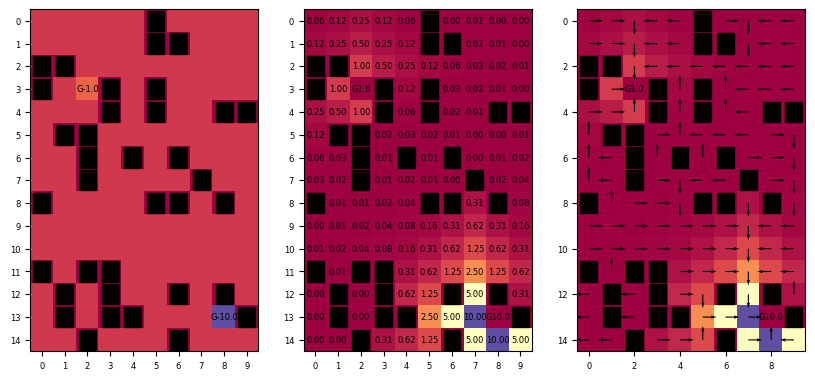

Yes, we converge w.r.t. our tolerance
Distance between V_11(S) and V_12(S) is: 0.00047841596538733945



gamma =  0.6000000000000001


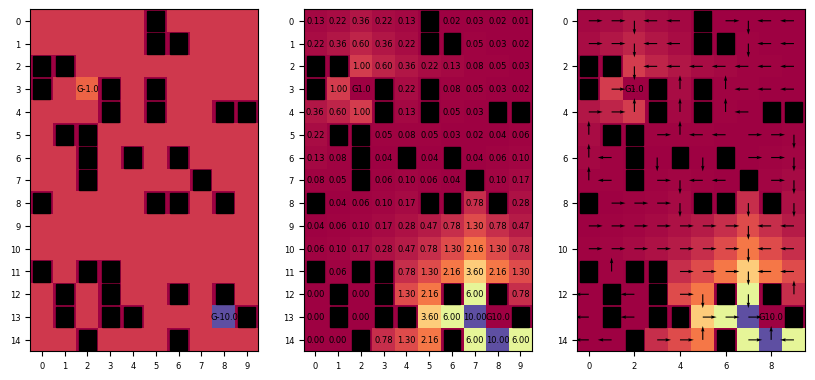

Yes, we converge w.r.t. our tolerance
Distance between V_12(S) and V_13(S) is: 0.00040593461349636644



gamma =  0.7000000000000001


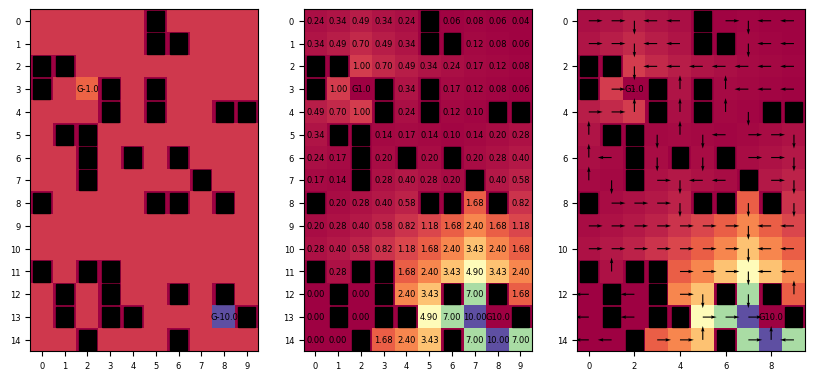

Yes, we converge w.r.t. our tolerance
Distance between V_14(S) and V_15(S) is: 0.0



gamma =  0.8


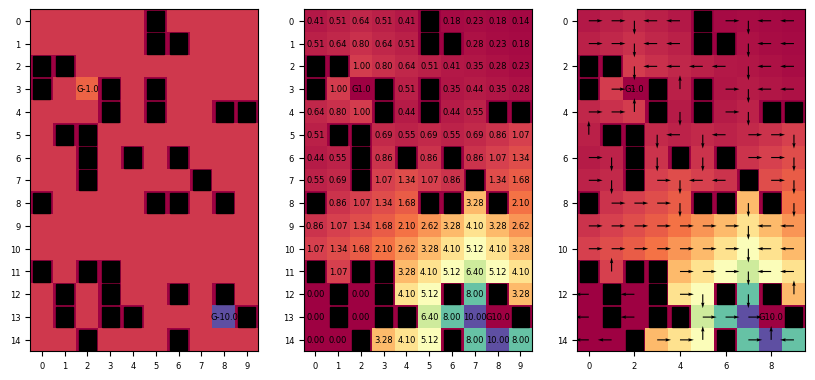

Yes, we converge w.r.t. our tolerance
Distance between V_19(S) and V_20(S) is: 0.0008081242311805061



gamma =  0.9


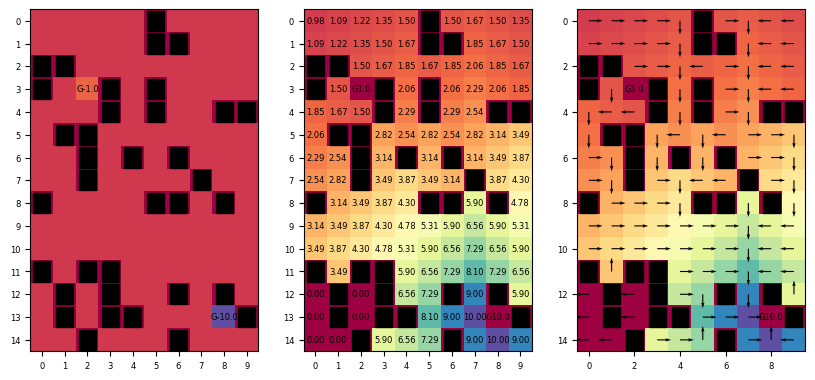

Yes, we converge w.r.t. our tolerance
Distance between V_23(S) and V_24(S) is: 0.0



gamma =  1.0


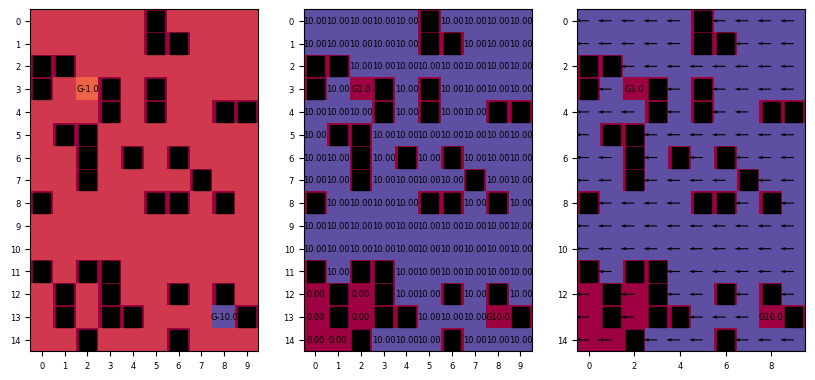

Yes, we converge w.r.t. our tolerance
Distance between V_23(S) and V_24(S) is: 0.0





In [ ]:
# (2) Changing gamma: everything else, position of the Nblocks included, remains fixed


# Build the world (and initial values)
World = PY_GW_VI_tools.new_world(Lx=Lx, Ly=Ly, Nblocks=Nblocks, goal=goal, rewards=rewards_list)
Values = np.zeros((Ly,Lx))

iterations_for = 10
max_n_of_iterations = 300

for n in range(1, iterations_for + 1):
    print("gamma = ", 0.1*n)
    World, NewValues, Policy, result_info, num_iter = PY_GW_VI_tools.solve_grid_world(
        World = World,
        initial_values = Values,
        max_n_of_iterations = max_n_of_iterations,
        gamma = 0.1*n,
        tolerance = tolerance,
        possible_actions = Actions,
        p = p,
        random_flag=random_flag)
    PY_GW_VI_plot.plot_world_values_policy(World=World, Values=NewValues, Policy=Policy)
    print(PY_GW_VI_tools.get_info_about_result(result_info = result_info))
    print("\n\n")

We have already mentioned in the comments of the code that the higher the value of `gamma`, the more forward-looking we are and take the future into account. [???CASO DI GAMMA CHE è 1]

In the case of multiple goals this concept has an impact on the choice of the goal-cell that the agent wants to reach. We observe that with low values of `gamma` the agent will be prone to going to the closest goal-cell while with high values of `gamma` the agent will seek for the goal-cell that will give it the highest reward.

However, consider that, reasonably, the agorithm behind this finds a compromise between the value of `gamma`, goal-cells proximity and associated rewards.

#### (3) An average time to fall below the tolerance

As already mentioned in the "Example 1" the generation of the gridworld is partially random since the amount `Nblock` is fixed but the position of the walls is not. We will now investigate an average of the time to reach the convergence as a function of `Lx` and `Ly` (the time required to do the plots will not be considered). The value of `max_n_of_iterations` is important to set a stop condition to the algorithm: we assume that the value we chose is high enough and that the convergence happens before. However, this is not sure and one may play with the variables and the code to see how many times the convergence is reached and how many times it is not. A high value of `num_tests` helps to obtain a better estimation.

In [ ]:
# (3) An average time to fall below the tolerance
# we use the function function_time that has already been defined

function_time(Lx=10, Ly=15, Nblocks=Nblocks, goal=goal,
              rewards_list=rewards_list, max_n_of_iterations=1000, gamma=gamma,
              p=p, random_flag=random_flag, num_tests=50)
print("\n")
function_time(Lx=15, Ly=15, Nblocks=Nblocks, goal=goal,
              rewards_list=rewards_list, max_n_of_iterations=1000, gamma=gamma,
              p=p, random_flag=random_flag, num_tests=50)
print("\n")
function_time(Lx=20, Ly=20, Nblocks=Nblocks, goal=goal,
              rewards_list=rewards_list, max_n_of_iterations=1000, gamma=gamma,
              p=p, random_flag=random_flag, num_tests=50)
print("\n")
function_time(Lx=25, Ly=25, Nblocks=Nblocks, goal=goal,
              rewards_list=rewards_list, max_n_of_iterations=1000, gamma=gamma,
              p=p, random_flag=random_flag, num_tests=50)
print("\n")

Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average time: 0.07248661994934082 seconds
Standard deviation: 0.016117301273508067 seconds


Lx = 15; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average time: 0.11387732028961181 seconds
Standard deviation: 0.01340096947973746 seconds


Lx = 20; Ly = 20
max_n_of_iterations = 1000; 50 tests
Average time: 0.26659058570861816 seconds
Standard deviation: 0.05524099135613068 seconds


Lx = 25; Ly = 25
max_n_of_iterations = 1000; 50 tests
Average time: 0.5799768018722534 seconds
Standard deviation: 0.07401028650306965 seconds




#### (4) Number of iterations to converge

Let's study the average amount of iterations needed to get the convergence (so to fall below the requested tolerance). We assume also in this case to have a value of `max_n_of_iterations` that is high enough and will not be reached:

In [ ]:
# (4) Number of iterations to converge
# we use the function function_convergence that has already been defined

function_convergence(Lx=10, Ly=15, Nblocks=Nblocks, goal=goal, rewards_list=rewards_list, max_n_of_iterations=1000, gamma=gamma, p=p, random_flag=random_flag, num_tests=50)
print("\n")
function_convergence(Lx=15, Ly=15, Nblocks=Nblocks, goal=goal, rewards_list=rewards_list, max_n_of_iterations=1000, gamma=gamma, p=p, random_flag=random_flag, num_tests=50)
print("\n")
function_convergence(Lx=20, Ly=20, Nblocks=Nblocks, goal=goal, rewards_list=rewards_list, max_n_of_iterations=1000, gamma=gamma, p=p, random_flag=random_flag, num_tests=50)
print("\n")
function_convergence(Lx=25, Ly=25, Nblocks=Nblocks, goal=goal, rewards_list=rewards_list, max_n_of_iterations=1000, gamma=gamma, p=p, random_flag=random_flag, num_tests=50)
print("\n")

Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average amount of iterations: 22.62
Standard deviation: 3.4576870882137385


Lx = 15; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average amount of iterations: 22.98
Standard deviation: 3.0231771367222264


Lx = 20; Ly = 20
max_n_of_iterations = 1000; 50 tests
Average amount of iterations: 24.96
Standard deviation: 0.4882622246293481


Lx = 25; Ly = 25
max_n_of_iterations = 1000; 50 tests
Average amount of iterations: 29.96
Standard deviation: 0.19595917942265423




### Tests - 3 goal-cells

Let's now play a little with the code. We will observe what happens changing the values of:
- `max_n_of_iterations` (1)
- `gamma` (2)

and we will investigate:
- an average time to fall below the tolerance (3)
- number of iterations to converge (4)

having 3 goal-cells.

So first of all let's set the parameters:

In [ ]:
# width of the grid; height of the grid; amount of cells that are walls in the grid
Lx = 10
Ly = 15
Nblocks = 40

# cells that are goals; amount of the rewards if the goals are reached.
# Remark that here we have two goals, and the rewards_list is therefore composed by two values
goal = [(13,8),(3,2),(11, 1)]
rewards_list = [10,1,40]

# the algorithm will stop after a certain amount of iterations max_n_of_iterations if it had not reached the
# desidered tolerance yet ( dist_2(V_(k+1) - V_(k)) < tolerance )
max_n_of_iterations = 300
tolerance = 0.001

# gamma is the discount factor, which expresses how far in the future we want your sum to contribute.
# The more gamma is high, the more forward-looking we are and take the future into account
gamma = 0.95

# probability that I take the action that maximises the V (V is the value of the policy).
# A value that is less than 1 means that with a probability 1 - p we will pick a random action (however,
# in the set of the random actions there is also the one that maximises the V)
p = 1

# random_flag=False means that the choice of the action is deterministic.
# Redundancy with p = 1, but the boolean value is safer to be used with comparisons (floats may give problems)
random_flag=False

#### (1) Changing `max_n_of_iterations`

max_n_of_iterations =  2


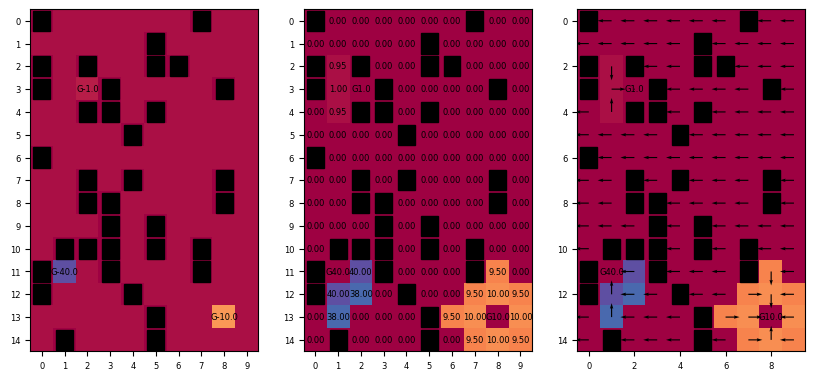

No, we stop before reaching the tolerance threshold
Distance between V_2(S) and V_3(S) is: 4.782819949221031



max_n_of_iterations =  4


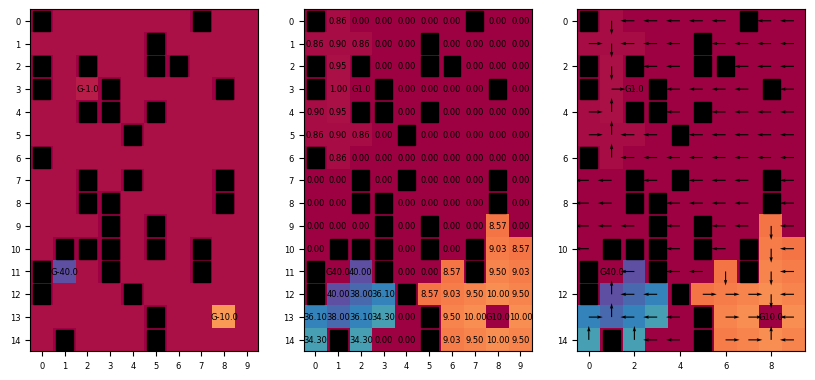

No, we stop before reaching the tolerance threshold
Distance between V_4(S) and V_5(S) is: 5.0509988336260445



max_n_of_iterations =  6


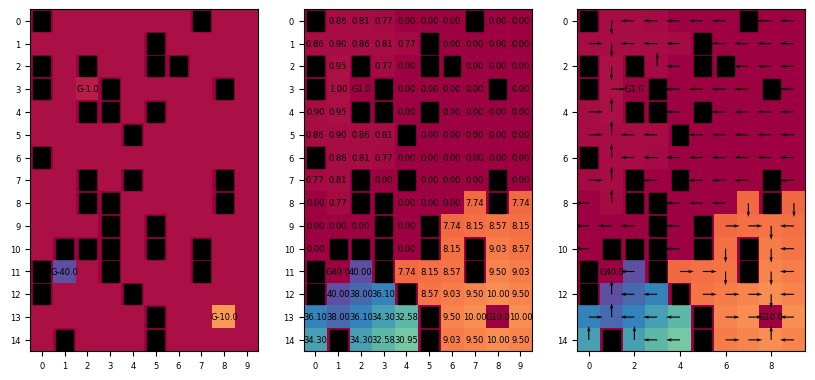

No, we stop before reaching the tolerance threshold
Distance between V_6(S) and V_7(S) is: 2.8296834924447976



max_n_of_iterations =  8


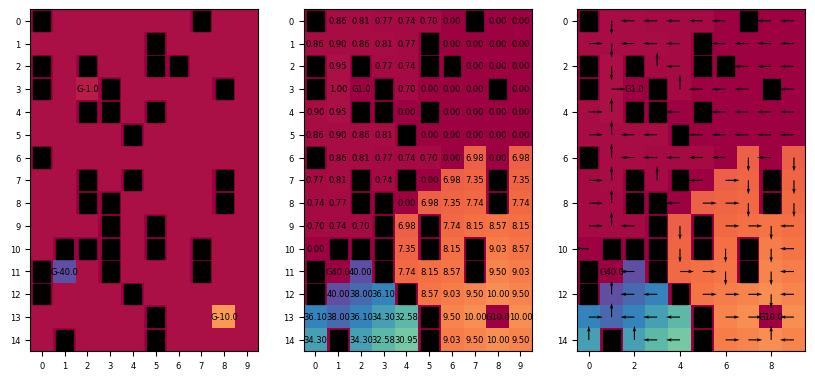

No, we stop before reaching the tolerance threshold
Distance between V_8(S) and V_9(S) is: 1.2813426927858202



max_n_of_iterations =  10


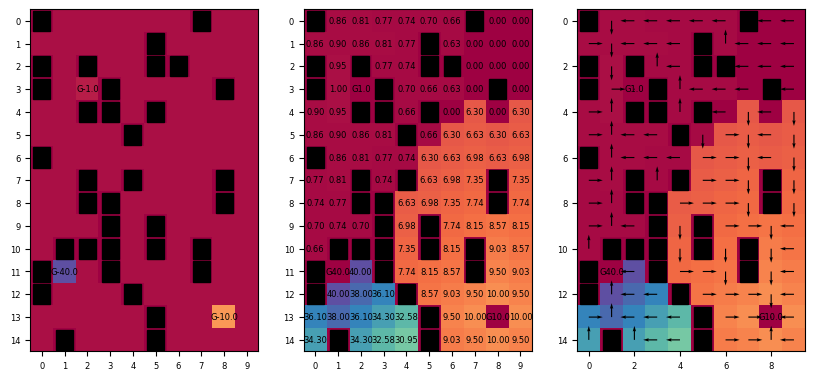

No, we stop before reaching the tolerance threshold
Distance between V_10(S) and V_11(S) is: 1.1286768934527005



max_n_of_iterations =  12


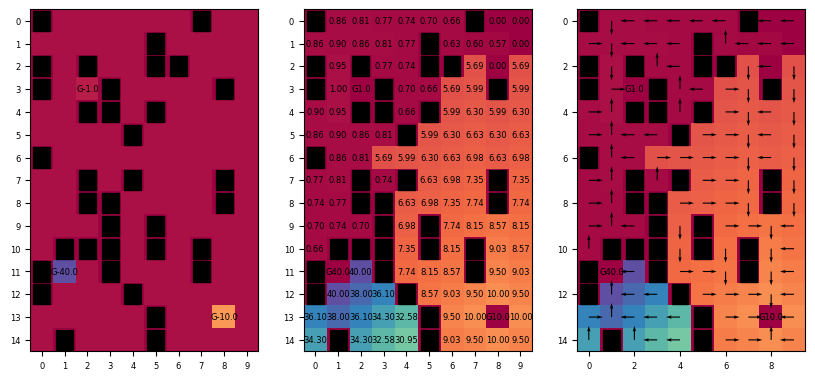

No, we stop before reaching the tolerance threshold
Distance between V_12(S) and V_13(S) is: 0.8746833749837627



max_n_of_iterations =  14


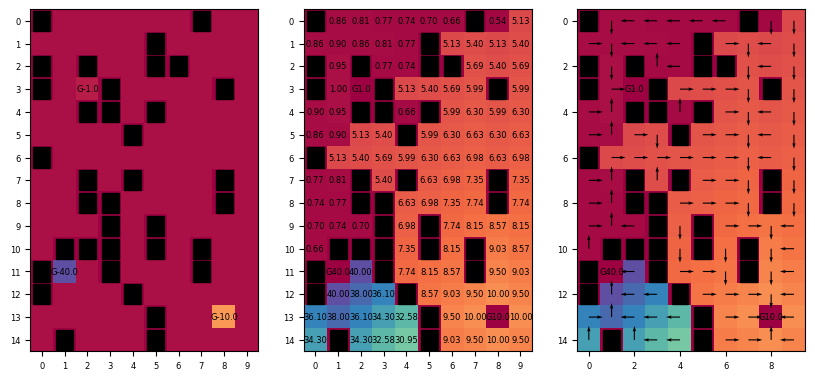

No, we stop before reaching the tolerance threshold
Distance between V_14(S) and V_15(S) is: 0.9081315129530217



max_n_of_iterations =  16


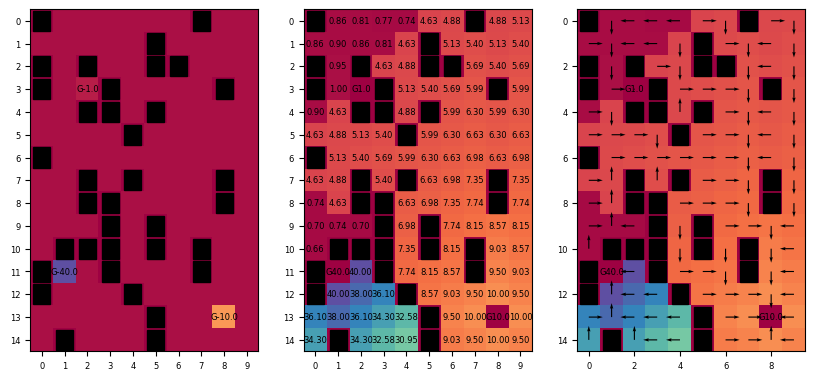

No, we stop before reaching the tolerance threshold
Distance between V_16(S) and V_17(S) is: 0.8281343890633249



max_n_of_iterations =  18


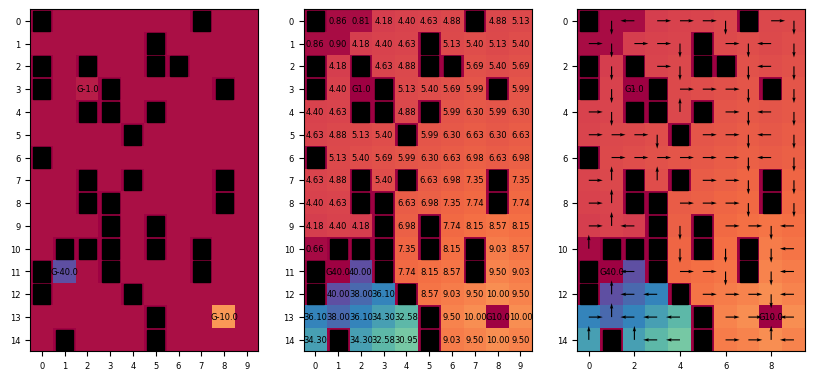

No, we stop before reaching the tolerance threshold
Distance between V_18(S) and V_19(S) is: 0.6183836428390425



max_n_of_iterations =  20


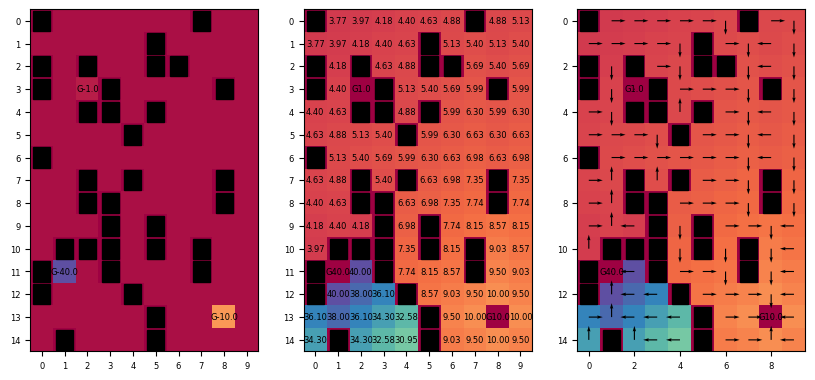

No, we stop before reaching the tolerance threshold
Distance between V_20(S) and V_21(S) is: 0.33672927059757835



max_n_of_iterations =  22


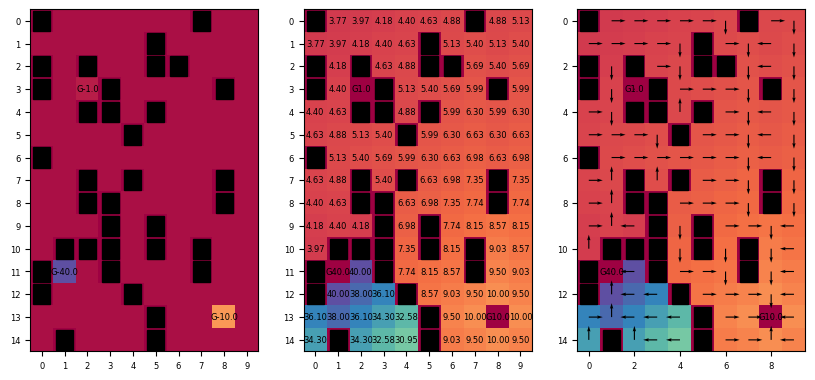

Yes, we converge w.r.t. our tolerance
Distance between V_20(S) and V_21(S) is: 0.0



max_n_of_iterations =  24


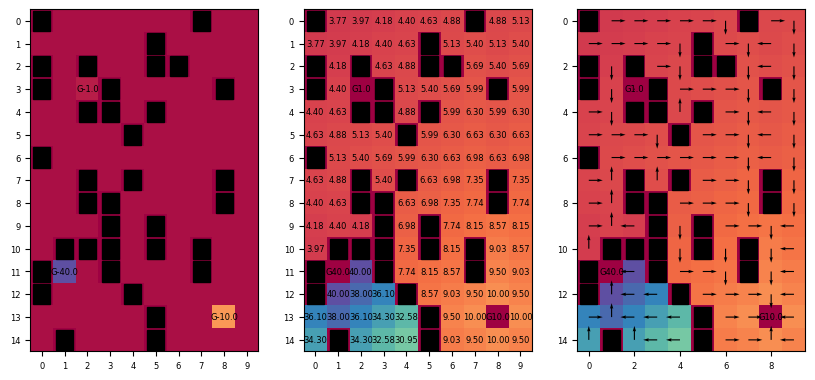

Yes, we converge w.r.t. our tolerance
Distance between V_20(S) and V_21(S) is: 0.0



max_n_of_iterations =  26


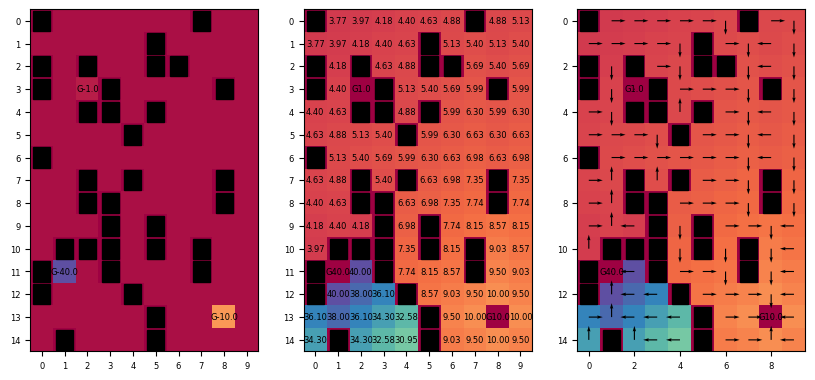

Yes, we converge w.r.t. our tolerance
Distance between V_20(S) and V_21(S) is: 0.0





In [ ]:
# (1) Changing max_n_of_iterations: everything else, position of the Nblocks included, remains fixed


# Build the world (and initial values)
World = PY_GW_VI_tools.new_world(Lx=Lx, Ly=Ly, Nblocks=Nblocks, goal=goal, rewards=rewards_list)
Values = np.zeros((Ly,Lx))

iterations_for = 13

for n in range(1, iterations_for + 1):
    print("max_n_of_iterations = ", n*2)
    World, NewValues, Policy, result_info, num_iter = PY_GW_VI_tools.solve_grid_world(
        World = World,
        initial_values = Values,
        max_n_of_iterations = n*2,
        gamma = gamma,
        tolerance = tolerance,
        possible_actions = Actions,
        p = p,
        random_flag=random_flag)
    PY_GW_VI_plot.plot_world_values_policy(World=World, Values=NewValues, Policy=Policy)
    print(PY_GW_VI_tools.get_info_about_result(result_info = result_info))
    print("\n\n")

A similar situation of the case with two goal-cells happens: here we have `gamma = 0.95` and the more iterations are allowed, the more the highest reward is attractive.

#### (2) Changing `gamma`

gamma =  0.1


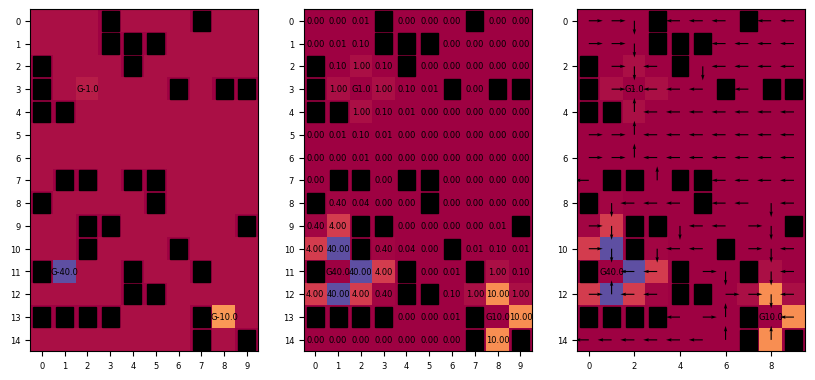

Yes, we converge w.r.t. our tolerance
Distance between V_4(S) and V_5(S) is: 0.0005948108943185221



gamma =  0.2


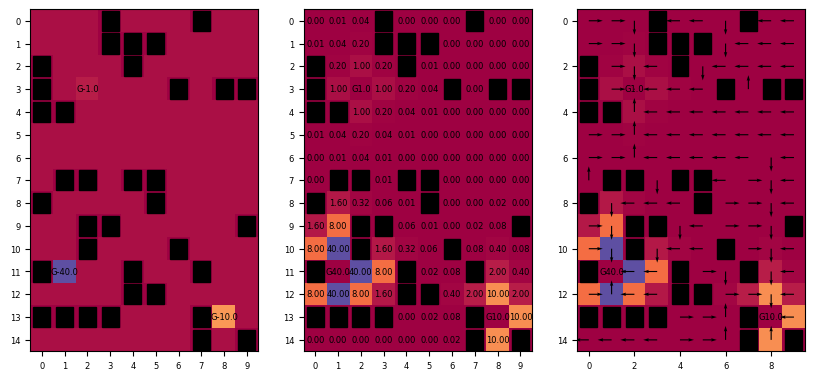

Yes, we converge w.r.t. our tolerance
Distance between V_6(S) and V_7(S) is: 0.00011766256838944156



gamma =  0.30000000000000004


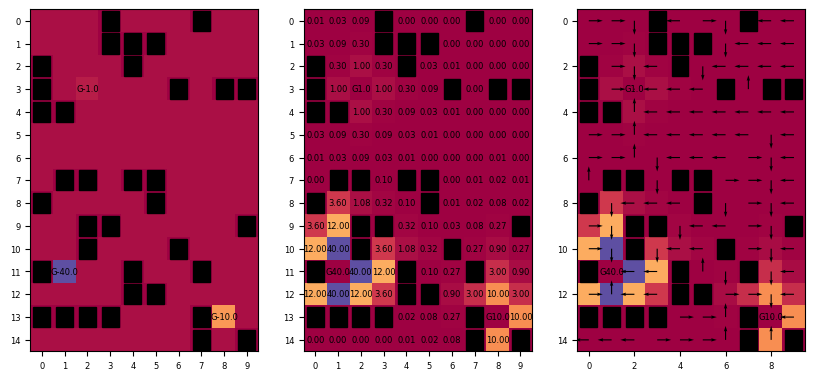

Yes, we converge w.r.t. our tolerance
Distance between V_7(S) and V_8(S) is: 0.00042151972480537655



gamma =  0.4


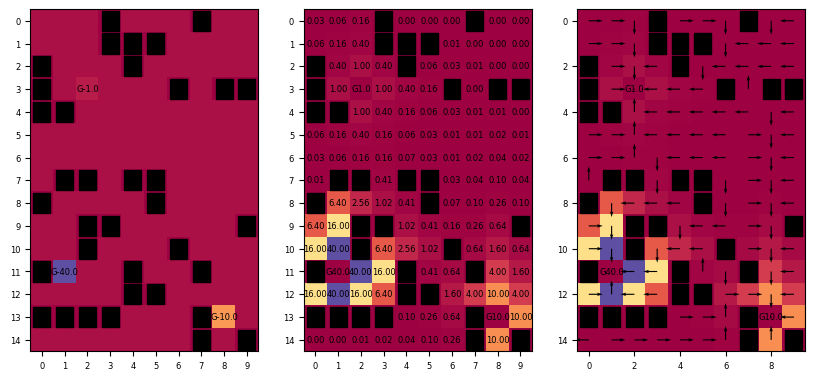

Yes, we converge w.r.t. our tolerance
Distance between V_9(S) and V_10(S) is: 0.00039470594166236405



gamma =  0.5


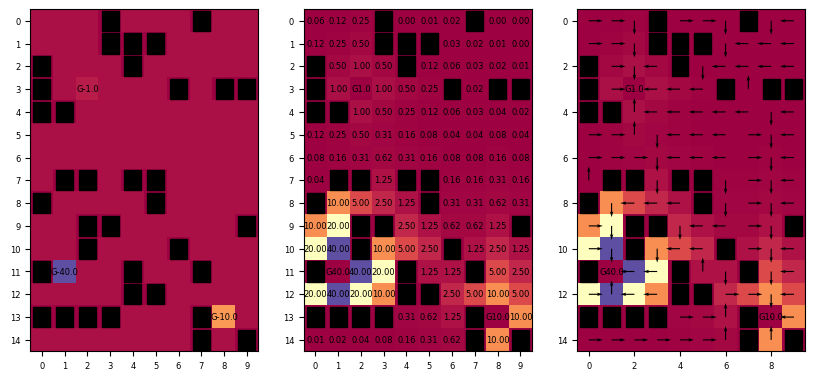

Yes, we converge w.r.t. our tolerance
Distance between V_11(S) and V_12(S) is: 0.0



gamma =  0.6000000000000001


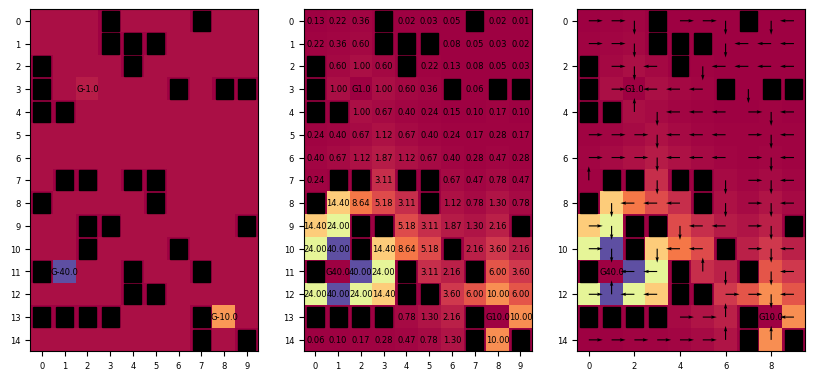

Yes, we converge w.r.t. our tolerance
Distance between V_12(S) and V_13(S) is: 0.0



gamma =  0.7000000000000001


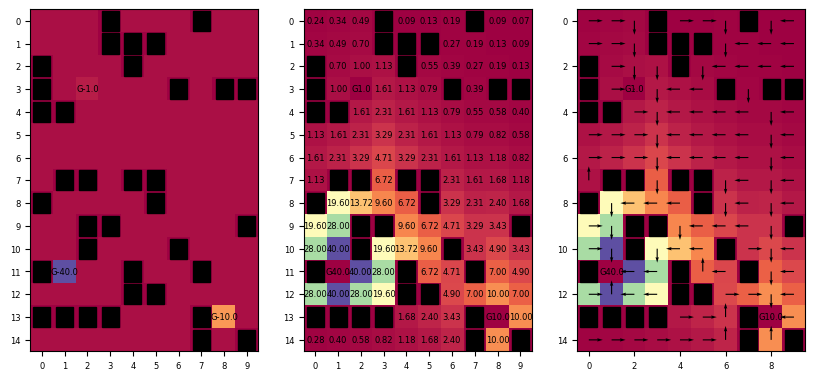

Yes, we converge w.r.t. our tolerance
Distance between V_19(S) and V_20(S) is: 0.0



gamma =  0.8


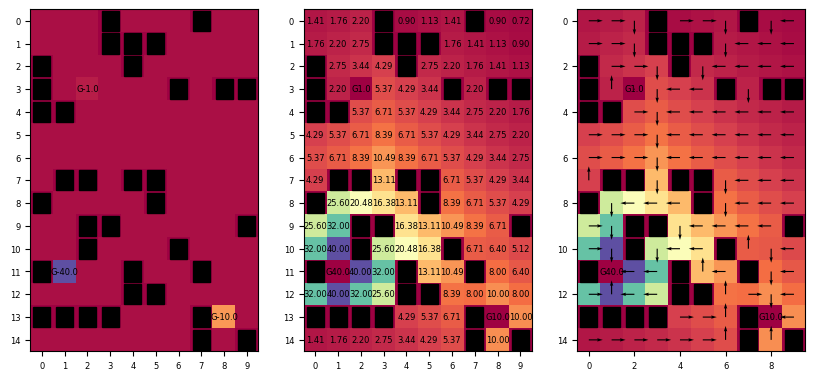

Yes, we converge w.r.t. our tolerance
Distance between V_19(S) and V_20(S) is: 0.0



gamma =  0.9


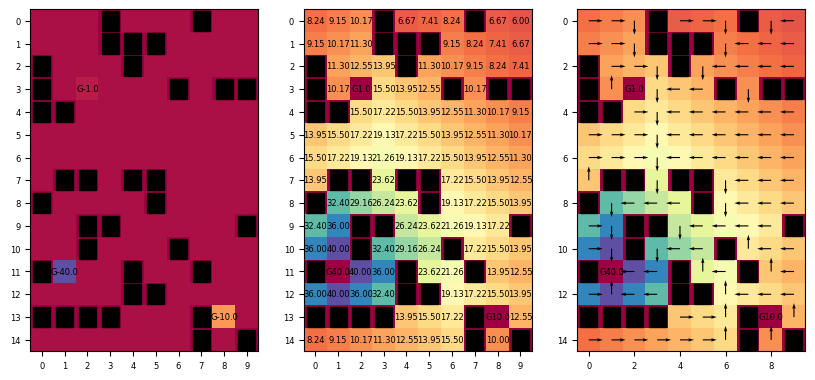

Yes, we converge w.r.t. our tolerance
Distance between V_19(S) and V_20(S) is: 0.0



gamma =  1.0


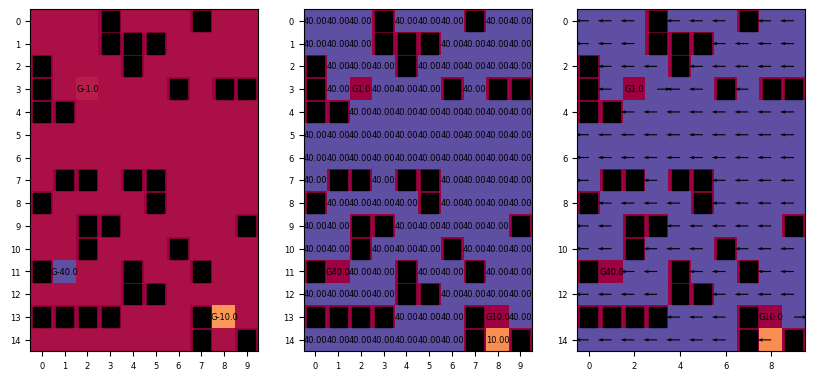

Yes, we converge w.r.t. our tolerance
Distance between V_19(S) and V_20(S) is: 0.0





In [ ]:
# (2) Changing gamma: everything else, position of the Nblocks included, remains fixed


# Build the world (and initial values)
World = PY_GW_VI_tools.new_world(Lx=Lx, Ly=Ly, Nblocks=Nblocks, goal=goal, rewards=rewards_list)
Values = np.zeros((Ly,Lx))

iterations_for = 10
max_n_of_iterations = 300

for n in range(1, iterations_for + 1):
    print("gamma = ", 0.1*n)
    World, NewValues, Policy, result_info, num_iter = PY_GW_VI_tools.solve_grid_world(
        World = World,
        initial_values = Values,
        max_n_of_iterations = max_n_of_iterations,
        gamma = 0.1*n,
        tolerance = tolerance,
        possible_actions = Actions,
        p = p,
        random_flag=random_flag)
    PY_GW_VI_plot.plot_world_values_policy(World=World, Values=NewValues, Policy=Policy)
    print(PY_GW_VI_tools.get_info_about_result(result_info = result_info))
    print("\n\n")

The same observations made for the case with two goal-cells hold.

#### (3) An average time to fall below the tolerance

Let's observe also in this case the average time required to fall below the needed tolerance (assuming the same hypotheses of the case of two goal-cells):

In [ ]:
# (3) An average time to fall below the tolerance
# we use the function function_time that has already been defined

function_time(Lx=10, Ly=15, Nblocks=Nblocks, goal=goal,
              rewards_list=rewards_list, max_n_of_iterations=1000, gamma=gamma,
              p=p, random_flag=random_flag, num_tests=50)
print("\n")
function_time(Lx=15, Ly=15, Nblocks=Nblocks, goal=goal,
              rewards_list=rewards_list, max_n_of_iterations=1000, gamma=gamma,
              p=p, random_flag=random_flag, num_tests=50)
print("\n")
function_time(Lx=20, Ly=20, Nblocks=Nblocks, goal=goal,
              rewards_list=rewards_list, max_n_of_iterations=1000, gamma=gamma,
            p=p, random_flag=random_flag, num_tests=50)
print("\n")
function_time(Lx=25, Ly=25, Nblocks=Nblocks, goal=goal,
              rewards_list=rewards_list, max_n_of_iterations=1000, gamma=gamma,
              p=p, random_flag=random_flag, num_tests=50)
print("\n")

Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average time: 0.06855612277984618 seconds
Standard deviation: 0.01106381824982552 seconds


Lx = 15; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average time: 0.13115177631378175 seconds
Standard deviation: 0.010564983859227784 seconds


Lx = 20; Ly = 20
max_n_of_iterations = 1000; 50 tests
Average time: 0.2960842704772949 seconds
Standard deviation: 0.018927838805242157 seconds


Lx = 25; Ly = 25
max_n_of_iterations = 1000; 50 tests
Average time: 0.6793283319473267 seconds
Standard deviation: 0.058813187783697145 seconds




#### (4) Number of iterations to converge

Also here we assume to have a value of `max_n_of_iterations` that is high enough and will not be reached:

In [ ]:
# (4) Number of iterations to converge
# we use the function function_convergence that has already been defined

function_convergence(Lx=10, Ly=15, Nblocks=Nblocks, goal=goal, rewards_list=rewards_list, max_n_of_iterations=1000, gamma=gamma, p=p, random_flag=random_flag, num_tests=50)
print("\n")
function_convergence(Lx=15, Ly=15, Nblocks=Nblocks, goal=goal, rewards_list=rewards_list, max_n_of_iterations=1000, gamma=gamma, p=p, random_flag=random_flag, num_tests=50)
print("\n")
function_convergence(Lx=20, Ly=20, Nblocks=Nblocks, goal=goal, rewards_list=rewards_list, max_n_of_iterations=1000, gamma=gamma, p=p, random_flag=random_flag, num_tests=50)
print("\n")
function_convergence(Lx=25, Ly=25, Nblocks=Nblocks, goal=goal, rewards_list=rewards_list, max_n_of_iterations=1000, gamma=gamma, p=p, random_flag=random_flag, num_tests=50)
print("\n")

Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average amount of iterations: 21.26
Standard deviation: 3.1036108003420786


Lx = 15; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average amount of iterations: 24.98
Standard deviation: 1.240806189539688


Lx = 20; Ly = 20
max_n_of_iterations = 1000; 50 tests
Average amount of iterations: 29.96
Standard deviation: 0.4454211490264017


Lx = 25; Ly = 25
max_n_of_iterations = 1000; 50 tests
Average amount of iterations: 36.92
Standard deviation: 0.2712931993250107




## Example 3: Gridworld problem with some random actions

Until this point we had that `p = 1` and `random_flag=False` meaning that the algorithm always takes the action that maximises the V. In this paragraph we will add a randomic flavour and will change the values of those two variables.

We will study what happens changing the values of:
-  `p` (1)

and we will investigate:
- an average time to fall below the tolerance (2)
- number of iterations to converge (3)

having one or two goal-cells.

### Tests - 1 goal-cell

First of all let's set the parameters:

In [ ]:
# width of the grid; height of the grid; amount of cells that are walls in the grid
Lx = 10 
Ly = 15
Nblocks = 40

# cells that are goals; amount of the rewards if the goals are reached
goal = [(9,9)]
rewards_list = [1] 

# the algorithm will stop after a certain amount of iterations max_n_of_iterations if it had not reached the
# desidered tolerance yet ( dist_2(V_(k+1) - V_(k)) < tolerance )
max_n_of_iterations = 300
tolerance = 0.001

# gamma is the discount factor, which expresses how far in the future we want your sum to contribute.
# The more gamma is high, the more forward-looking we are and take the future into account
gamma = 0.95

# probability that I take the action that maximises the V (V is the value of the policy).
# A value that is less than 1 means that with a probability 1 - p we will pick a random action (however,
# in the set of the random actions there is also the one that maximises the V)
p = 0.1

# random_flag=False means that the choice of the action is deterministic.
# Redundancy with p = 1, but the boolean value is safer to be used with comparisons (floats may give problems)
random_flag=True

#### (1) Changing `p`

p =  0.1


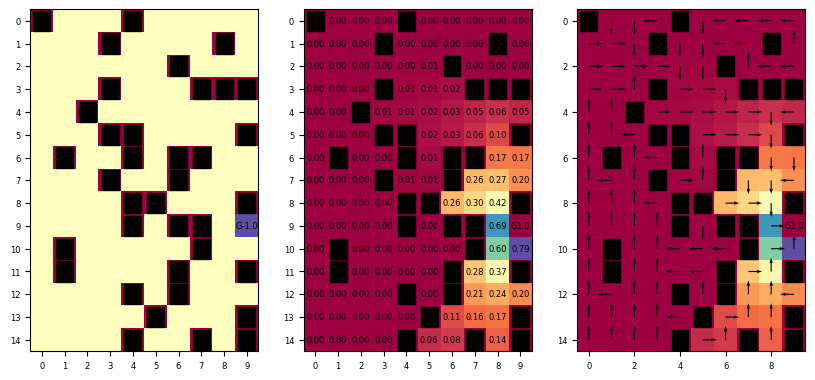

Yes, we converge w.r.t. our tolerance
Distance between V_31(S) and V_32(S) is: 0.0009469452653469426



p =  0.2


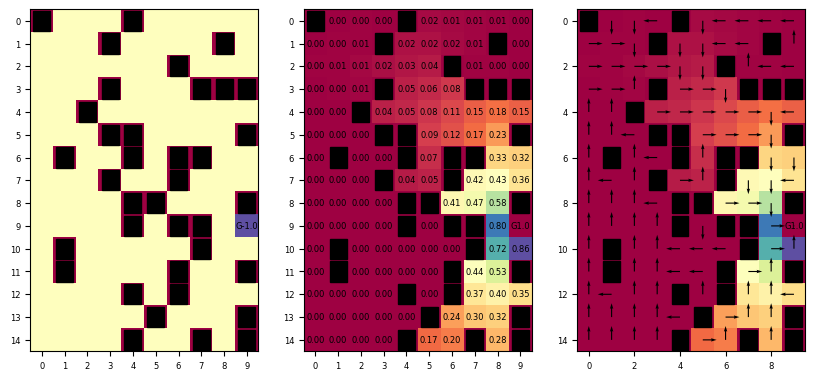

Yes, we converge w.r.t. our tolerance
Distance between V_37(S) and V_38(S) is: 0.000995060021325034



p =  0.30000000000000004


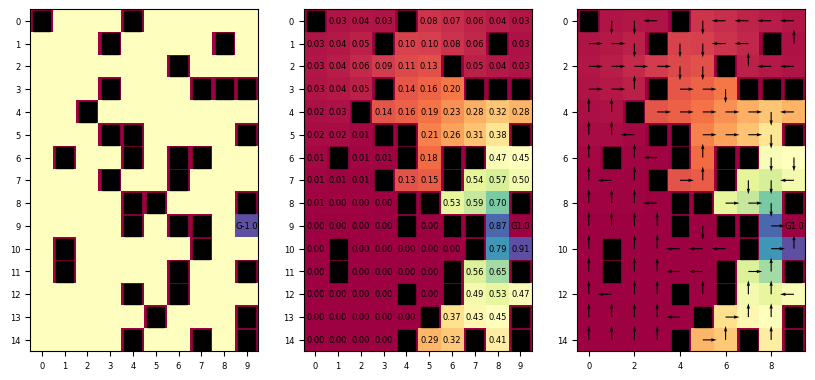

Yes, we converge w.r.t. our tolerance
Distance between V_45(S) and V_46(S) is: 0.0009597733737159849



p =  0.4


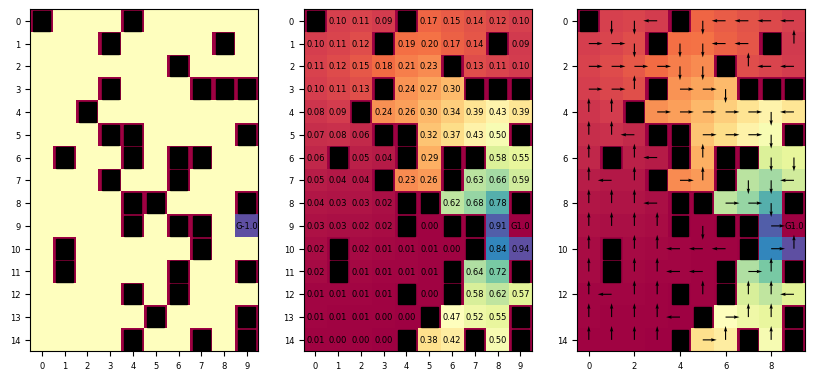

Yes, we converge w.r.t. our tolerance
Distance between V_50(S) and V_51(S) is: 0.000980222570911853



p =  0.5


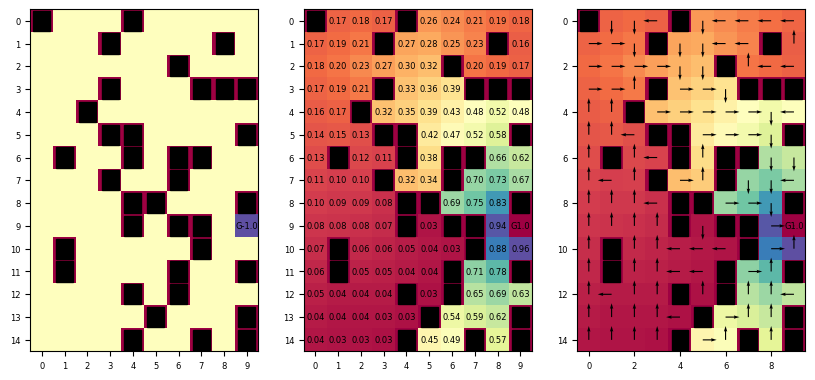

Yes, we converge w.r.t. our tolerance
Distance between V_54(S) and V_55(S) is: 0.0009653624842102858



p =  0.6000000000000001


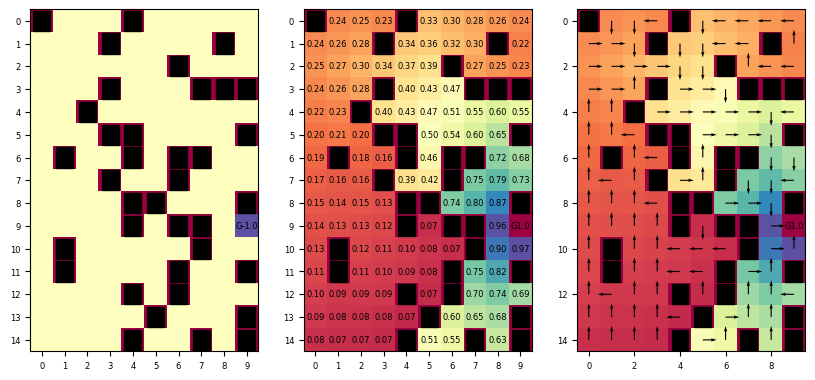

Yes, we converge w.r.t. our tolerance
Distance between V_52(S) and V_53(S) is: 0.0009499386266361386



p =  0.7000000000000001


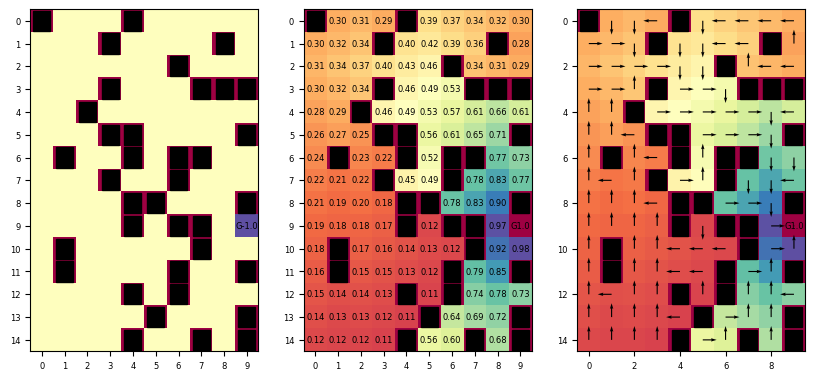

Yes, we converge w.r.t. our tolerance
Distance between V_47(S) and V_48(S) is: 0.0009762903020078678



p =  0.8


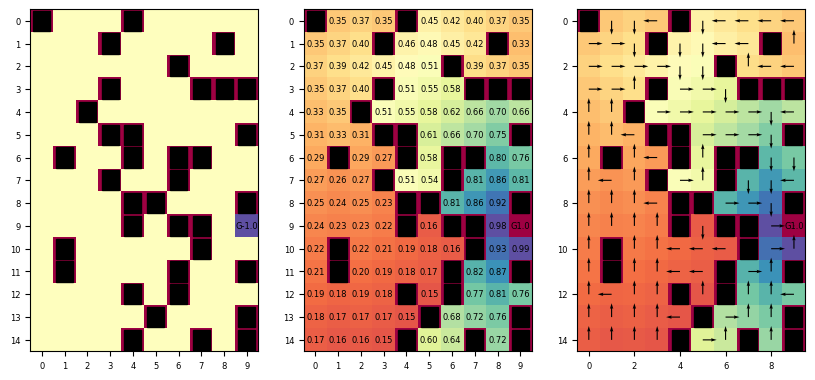

Yes, we converge w.r.t. our tolerance
Distance between V_42(S) and V_43(S) is: 0.000881810087147464



p =  0.9


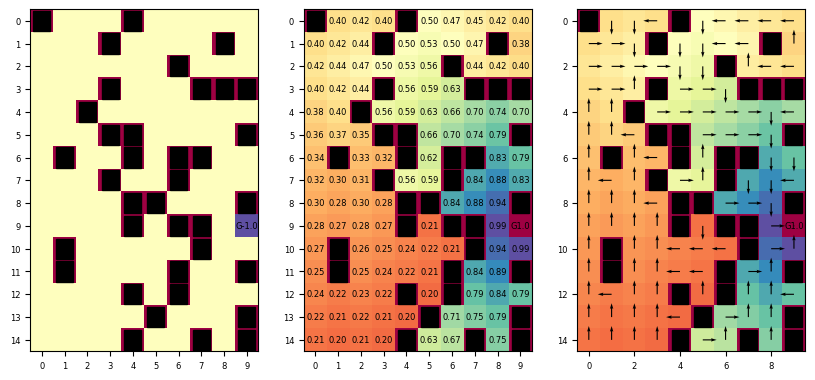

Yes, we converge w.r.t. our tolerance
Distance between V_37(S) and V_38(S) is: 0.0006675080136748135





In [ ]:
# (1) Changing p: everything else, position of the Nblocks included, remains fixed


# Build the world (and initial values)
World = PY_GW_VI_tools.new_world(Lx=Lx, Ly=Ly, Nblocks=Nblocks, goal=goal, rewards=rewards_list)
Values = np.zeros((Ly,Lx))

iterations_for = 10

for n in range(1, iterations_for):
    print("p = ", 0.1*n)
    World, NewValues, Policy, result_info, num_iter = PY_GW_VI_tools.solve_grid_world(
        World = World,
        initial_values = Values,
        max_n_of_iterations = max_n_of_iterations,
        gamma = gamma,
        tolerance = tolerance,
        possible_actions = Actions,
        p = 0.1*n,
        random_flag=random_flag)
    PY_GW_VI_plot.plot_world_values_policy(World=World, Values=NewValues, Policy=Policy)
    print(PY_GW_VI_tools.get_info_about_result(result_info = result_info))
    print("\n\n")

The direction of the arrows stays more or less the same (however, one can observe that there are some slight changes): the main thing that varies is the color of plot, i.e. [???COSA?] [???PERCHé C'è UN VALORE DI V MOLTO ALTO PER I p MEDIANI? SEMBRA UNA PARABOLA].

Observe that we are still able to reach the goal-cell in a decent amount of iterations: as a matter of fact, one needs to remember that `p` is the probability to pick the actions that maximises V and `1 - p` the probability to have a random action (where in the set of "random action" we include the optimal one). Additionally, remark that we will have this kind of situation:

- `p + (1 - p)/len(Actions)` is the total probability to pick the action A, that maximises V
- `(1 - p)/len(Actions)` is the probability to pick the action B among the other three
- `(1 - p)/len(Actions)` is the probability to pick the action C among the remaining two
- `(1 - p)/len(Actions)` is the probability to pick the last action, D

#### (2) An average time to fall below the tolerance

In this case we will keep `Lx` and `Ly` fixed, and the analysis will depend on the value of `p`:

In [ ]:
# (2) An average time to fall below the tolerance
# we use the function function_time that has already been defined

for n in range(1, 11):
    print("p = ", 0.1*n)
    function_time(Lx=10, Ly=15, Nblocks=Nblocks, goal=goal, rewards_list=rewards_list, max_n_of_iterations=1000, gamma=gamma, p=0.1*n, random_flag=random_flag, num_tests=50)
    print("\n")


p =  0.1
Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average time: 0.4673341178894043 seconds
Standard deviation: 0.06481640080214238 seconds


p =  0.2
Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average time: 0.7174964570999145 seconds
Standard deviation: 0.11396419766207425 seconds


p =  0.30000000000000004
Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average time: 0.8272128248214722 seconds
Standard deviation: 0.1551608281977778 seconds


p =  0.4
Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average time: 0.7884487438201905 seconds
Standard deviation: 0.12982794055590832 seconds


p =  0.5
Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average time: 0.7393778944015503 seconds
Standard deviation: 0.12419879429213376 seconds


p =  0.6000000000000001
Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average time: 0.719694037437439 seconds
Standard deviation: 0.131355964288803 seconds


p =  0.7000000000000001
Lx = 10; Ly = 15
max_n_of

[???ANCHE QUI C'è UNA SORTA DI PARABOLA PER IL TEMPO NECESSARIO]

#### (3) Number of iterations to converge

We will keep `Lx` and `Ly` fixed, and the analysis will depend on the value of `p`:

In [ ]:
# (3) Number of iterations to converge
# we use the function function_convergence that has already been defined

for n in range(1, 11):
    function_convergence(Lx=10, Ly=15, Nblocks=Nblocks, goal=goal, rewards_list=rewards_list, max_n_of_iterations=1000, gamma=gamma, p=0.1*n, random_flag=random_flag, num_tests=50)
    print("\n")

Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average amount of iterations: 70.24
Standard deviation: 4.810654841079331


Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average amount of iterations: 75.1
Standard deviation: 6.469157595854347


Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average amount of iterations: 71.78
Standard deviation: 6.682185271301598


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Gaia\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Gaia\AppData\Local\Temp\ipykernel_47760\128314829.py", line 5, in <module>
    function_convergence(Lx=10, Ly=15, Nblocks=Nblocks, goal=goal, rewards_list=rewards_list, max_n_of_iterations=1000, gamma=gamma, p=0.1*n, random_flag=random_flag, num_tests=50)
  File "C:\Users\Gaia\AppData\Local\Temp\ipykernel_47760\3981331728.py", line 14, in function_convergence
    World, NewValues, Policy, result_info, num_iter = PY_GW_VI_tools.solve_grid_world(
                                                      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Gaia\Desktop\GITHUB\RL-project\PY_GW_VI_tools.py", line 181, in solve_grid_world
    NewValues, Policy = update_values(Values=Values, World=World, gamma=gamma, possible_actions=possible_actions, p = p, random_flag=

### Tests - 2 goal-cells

First of all let's set the parameters:

In [ ]:
# width of the grid; height of the grid; amount of cells that are walls in the grid
Lx = 10 
Ly = 15
Nblocks = 40

# cells that are goals; amount of the rewards if the goals are reached
goal = [(13,8),(3,2)]
rewards_list = [10,1]

# the algorithm will stop after a certain amount of iterations max_n_of_iterations if it had not reached the
# desidered tolerance yet ( dist_2(V_(k+1) - V_(k)) < tolerance )
max_n_of_iterations = 300
tolerance = 0.001

# gamma is the discount factor, which expresses how far in the future we want your sum to contribute.
# The more gamma is high, the more forward-looking we are and take the future into account
gamma = 0.95

# probability that I take the action that maximises the V (V is the value of the policy).
# A value that is less than 1 means that with a probability 1 - p we will pick a random action (however,
# in the set of the random actions there is also the one that maximises the V)
p = 0.1

# random_flag=False means that the choice of the action is deterministic.
# Redundancy with p = 1, but the boolean value is safer to be used with comparisons (floats may give problems)
random_flag=True

#### (1) Changing `p`

p =  0.1


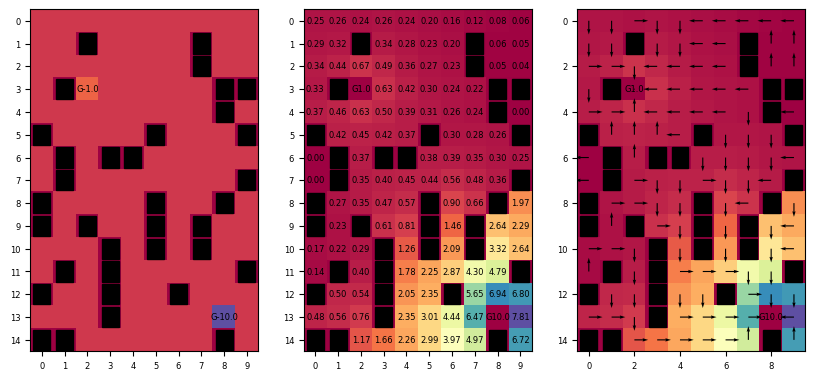

Yes, we converge w.r.t. our tolerance
Distance between V_70(S) and V_71(S) is: 0.00094950760657532



p =  0.2


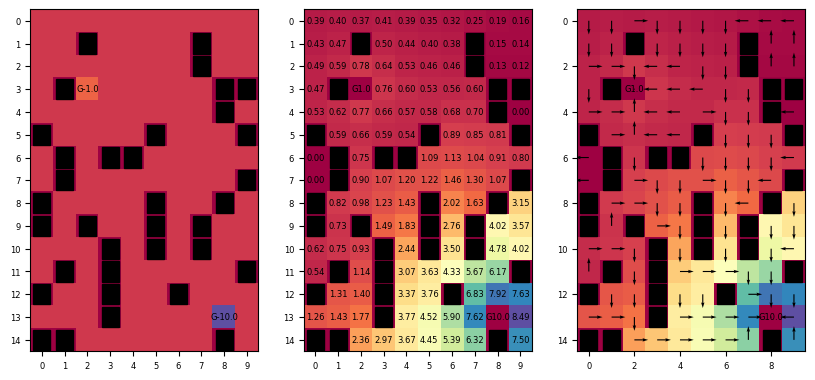

Yes, we converge w.r.t. our tolerance
Distance between V_73(S) and V_74(S) is: 0.000993784865636533



p =  0.30000000000000004


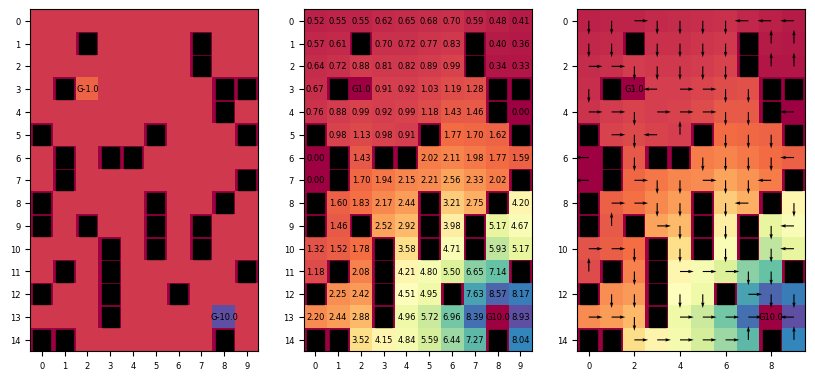

Yes, we converge w.r.t. our tolerance
Distance between V_73(S) and V_74(S) is: 0.0009263669981222611



p =  0.4


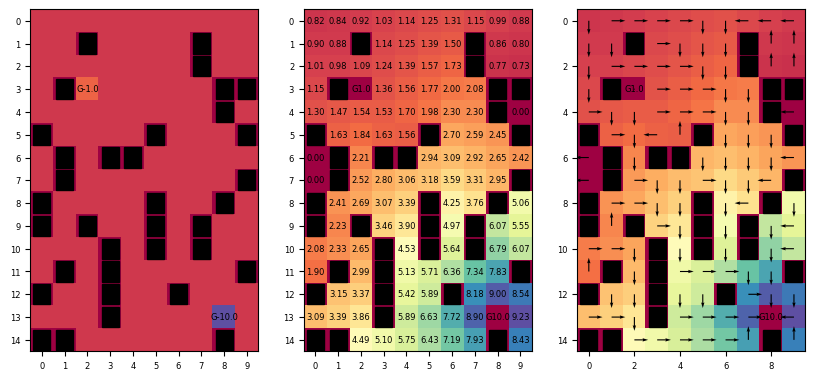

Yes, we converge w.r.t. our tolerance
Distance between V_69(S) and V_70(S) is: 0.0009554416366204305



p =  0.5


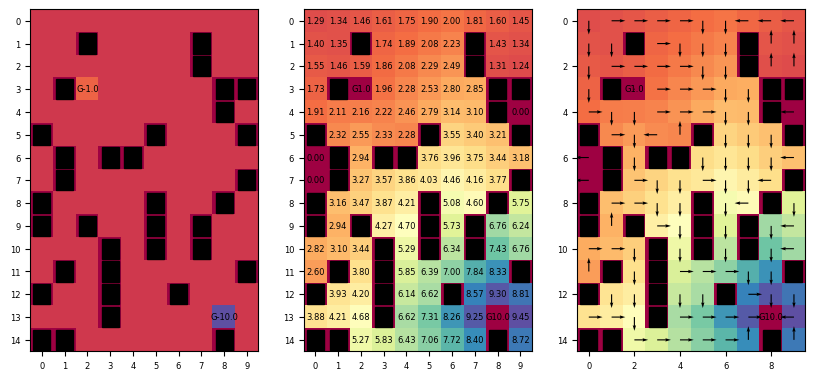

Yes, we converge w.r.t. our tolerance
Distance between V_60(S) and V_61(S) is: 0.0009333669808252711



p =  0.6000000000000001


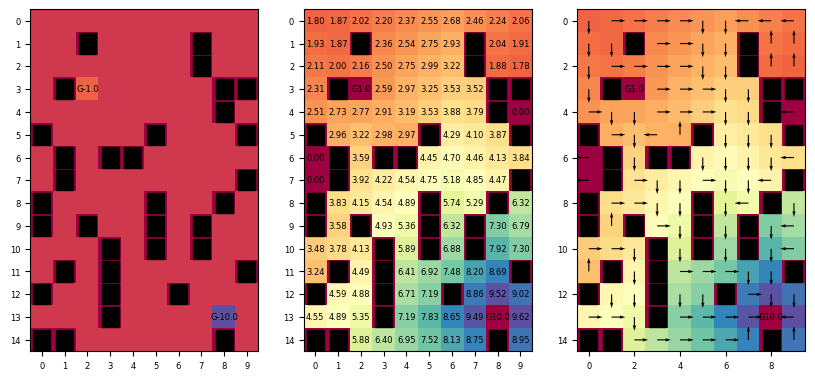

Yes, we converge w.r.t. our tolerance
Distance between V_51(S) and V_52(S) is: 0.0009468489040594638



p =  0.7000000000000001


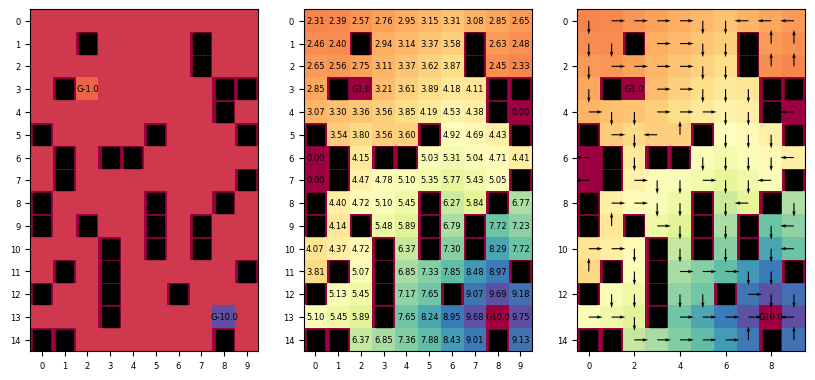

Yes, we converge w.r.t. our tolerance
Distance between V_43(S) and V_44(S) is: 0.0009900689433920225



p =  0.8


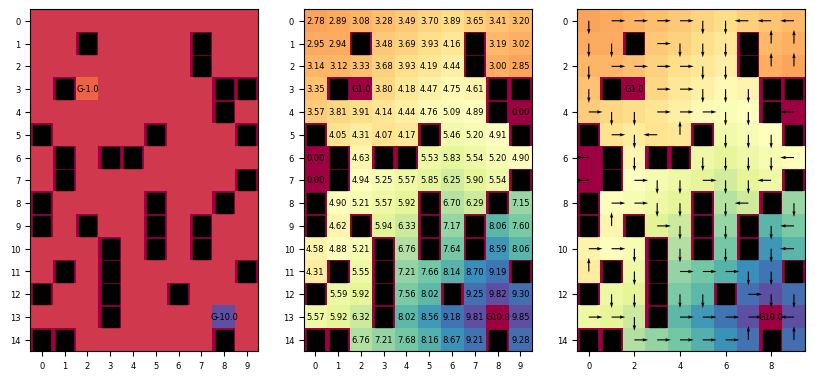

Yes, we converge w.r.t. our tolerance
Distance between V_37(S) and V_38(S) is: 0.0006522887968734153



p =  0.9


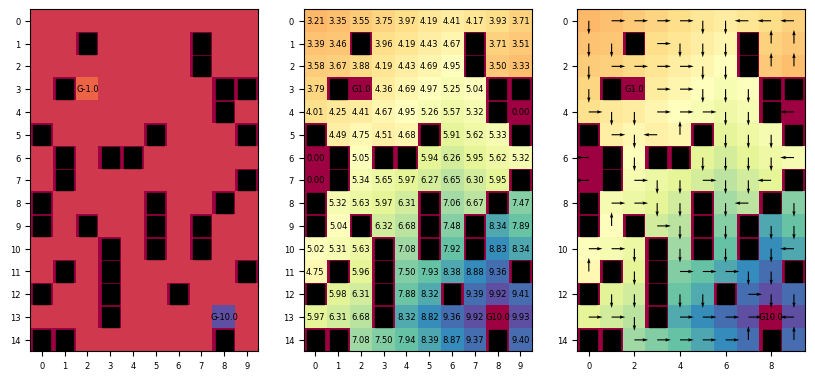

Yes, we converge w.r.t. our tolerance
Distance between V_30(S) and V_31(S) is: 0.0008851447500348192





In [ ]:
# (1) Changing p: everything else, position of the Nblocks included, remains fixed


# Build the world (and initial values)
World = PY_GW_VI_tools.new_world(Lx=Lx, Ly=Ly, Nblocks=Nblocks, goal=goal, rewards=rewards_list)
Values = np.zeros((Ly,Lx))

iterations_for = 10

for n in range(1, iterations_for):
    print("p = ", 0.1*n)
    World, NewValues, Policy, result_info, num_iter = PY_GW_VI_tools.solve_grid_world(
        World = World,
        initial_values = Values,
        max_n_of_iterations = max_n_of_iterations,
        gamma = gamma,
        tolerance = tolerance,
        possible_actions = Actions,
        p = 0.1*n,
        random_flag=random_flag)
    PY_GW_VI_plot.plot_world_values_policy(World=World, Values=NewValues, Policy=Policy)
    print(PY_GW_VI_tools.get_info_about_result(result_info = result_info))
    print("\n\n")

The direction of the arrows stays more or less the same (however, one can observe that there are some slight changes): the main thing that varies is the color of plot, i.e. [???COSA?] [???PERCHé C'è UN VALORE DI V MOLTO ALTO PER I p MEDIANI? SEMBRA UNA PARABOLA] [???DA RIVEDERE. è COPIA-INOCLLA DALLE COSE VISTE PRECEDENTEMENTE]

#### (2) An average time to fall below the tolerance

In this case we will keep `Lx` and `Ly` fixed, and the analysis will depend on the value of `p`:

In [ ]:
# (2) An average time to fall below the tolerance
# we use the function function_time that has already been defined

for n in range(1, 11):
    print("p = ", 0.1*n)
    function_time(Lx=10, Ly=15, Nblocks=Nblocks, goal=goal, rewards_list=rewards_list, max_n_of_iterations=1000, gamma=gamma, p=0.1*n, random_flag=random_flag, num_tests=50)
    print("\n")

p =  0.1
Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average time: 1.0491938161849976 seconds
Standard deviation: 0.19160351565515996 seconds


p =  0.2
Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average time: 1.8257815551757812 seconds
Standard deviation: 0.42363744300802403 seconds


p =  0.30000000000000004
Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average time: 1.3364981460571288 seconds
Standard deviation: 0.18674124150292232 seconds


p =  0.4
Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average time: 1.3211165857315064 seconds
Standard deviation: 0.1394698271140562 seconds


p =  0.5
Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average time: 1.1883352756500245 seconds
Standard deviation: 0.1593130769561541 seconds


p =  0.6000000000000001
Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average time: 1.0382594060897827 seconds
Standard deviation: 0.1367067069005693 seconds


p =  0.7000000000000001
Lx = 10; Ly = 15
max_n_o

#### (3) Number of iterations to converge

We will keep `Lx` and `Ly` fixed, and the analysis will depend on the value of `p`:

In [ ]:
# (3) Number of iterations to converge
# we use the function function_convergence that has already been defined

for n in range(1, 11):
    function_convergence(Lx=10, Ly=15, Nblocks=Nblocks, goal=goal, rewards_list=rewards_list, max_n_of_iterations=1000, gamma=gamma, p=0.1*n, random_flag=random_flag, num_tests=50)
    print("\n")

### Tests - Multiple goals

In this section we want to study the effect of randomicity (quantitatively indicated by the value of `p` in particular) on the path that, then, the agent will follow. We will assume that there are no wall-cells:

In [ ]:
# width of the grid; height of the grid; amount of cells that are walls in the grid
Lx = 10 
Ly = 15
Nblocks = 0

# cells that are goals; amount of the rewards if the goals are reached
goal = [(3,3),(4,3),(5,3),(13,8),(10,5)]
rewards_list = [-10, -10, -10, 10,-50]

# the algorithm will stop after a certain amount of iterations max_n_of_iterations if it had not reached the
# desidered tolerance yet ( dist_2(V_(k+1) - V_(k)) < tolerance )
max_n_of_iterations = 300
tolerance = 0.001

# gamma is the discount factor, which expresses how far in the future we want your sum to contribute.
# The more gamma is high, the more forward-looking we are and take the future into account
gamma = 0.95

# probability that I take the action that maximises the V (V is the value of the policy).
# A value that is less than 1 means that with a probability 1 - p we will pick a random action (however,
# in the set of the random actions there is also the one that maximises the V)
p = 0.1

# random_flag=False means that the choice of the action is deterministic.
# Redundancy with p = 1, but the boolean value is safer to be used with comparisons (floats may give problems)
random_flag=True

p =  0.1


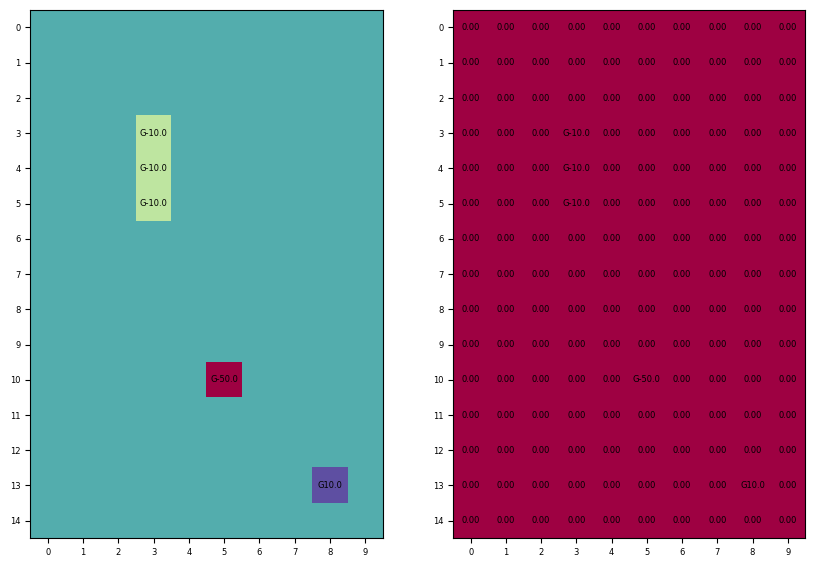

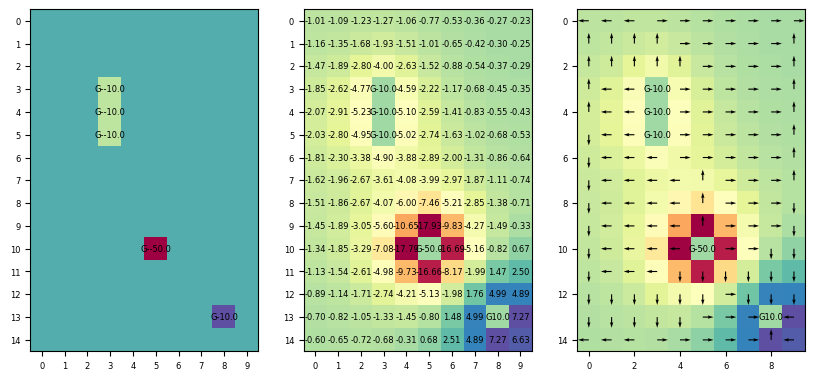

Yes, we converge w.r.t. our tolerance
Distance between V_71(S) and V_72(S) is: 0.0009456024150888648



p =  0.2


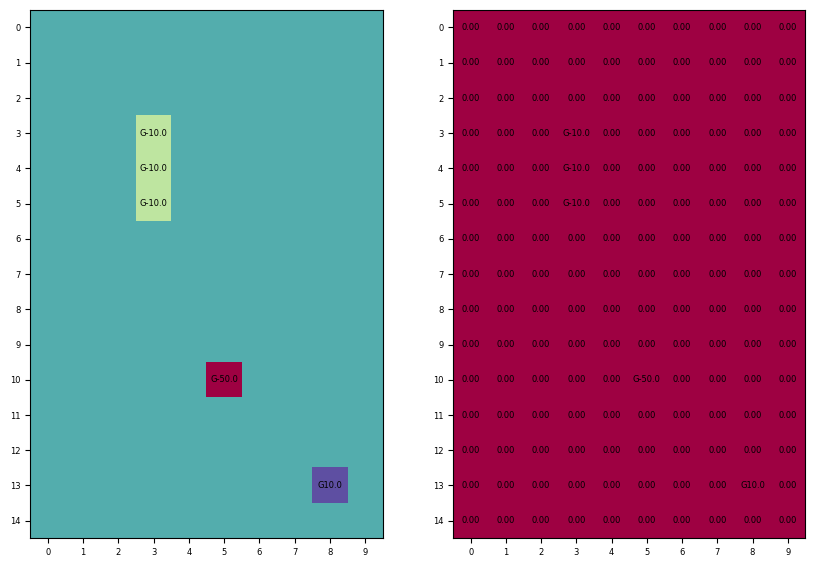

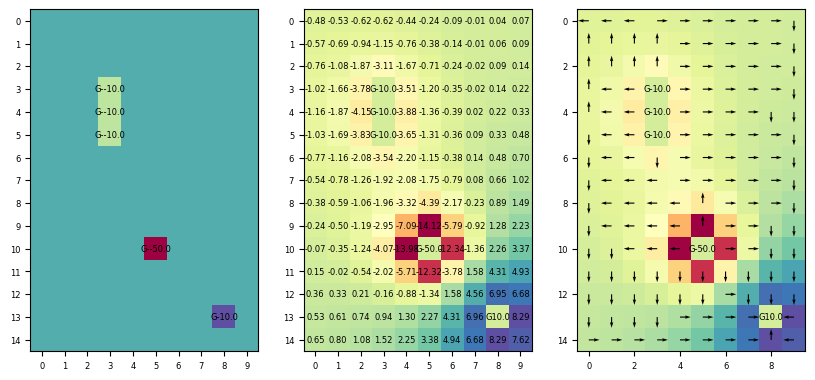

Yes, we converge w.r.t. our tolerance
Distance between V_64(S) and V_65(S) is: 0.0009778127331673294



p =  0.30000000000000004


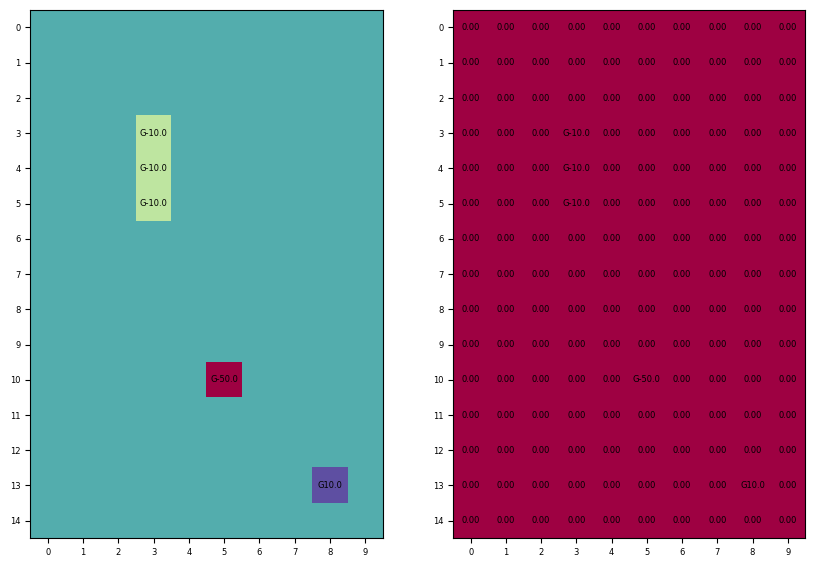

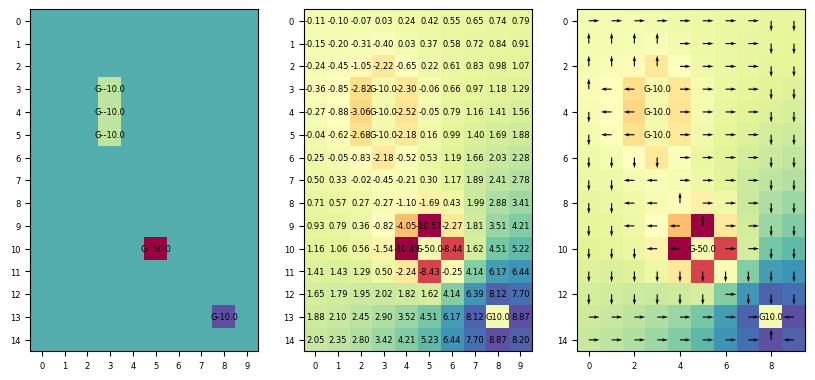

Yes, we converge w.r.t. our tolerance
Distance between V_74(S) and V_75(S) is: 0.00097539353822782



p =  0.4


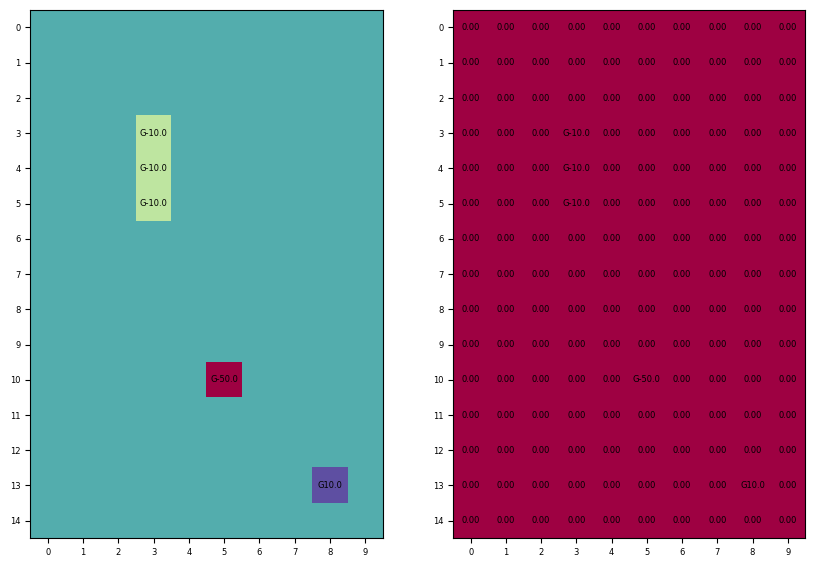

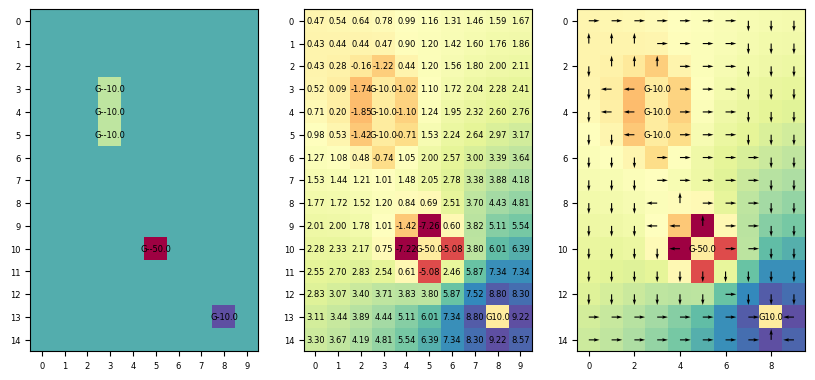

Yes, we converge w.r.t. our tolerance
Distance between V_68(S) and V_69(S) is: 0.000982577899513933



p =  0.5


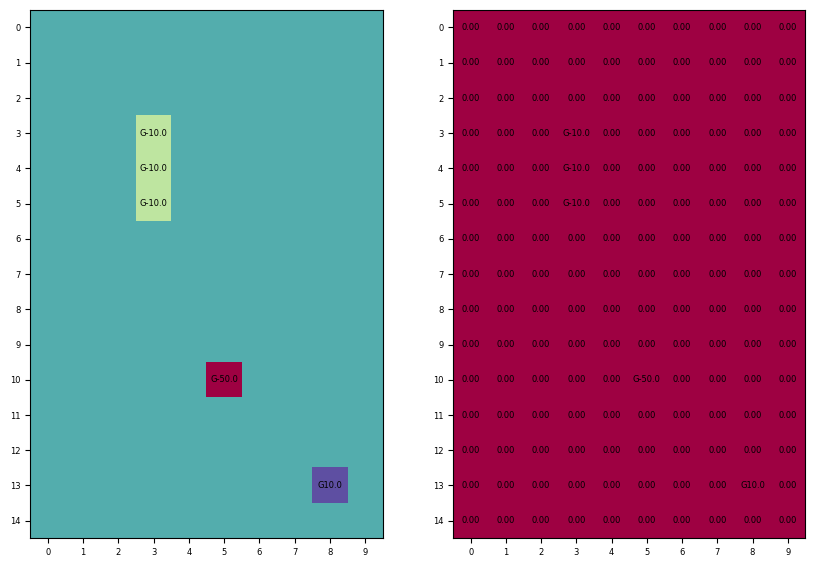

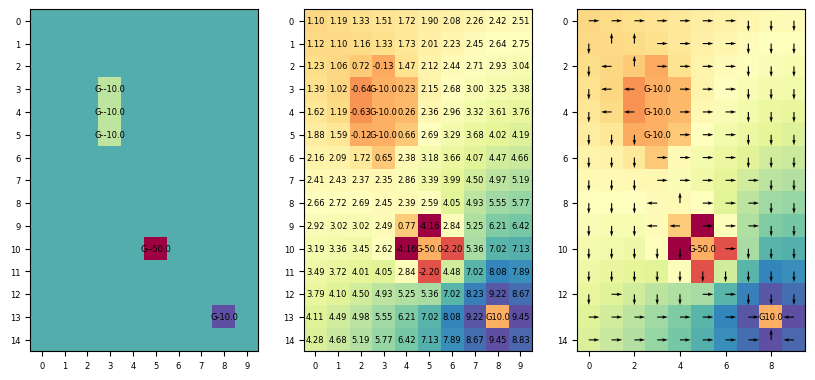

Yes, we converge w.r.t. our tolerance
Distance between V_59(S) and V_60(S) is: 0.0009321327372984594



p =  0.6000000000000001


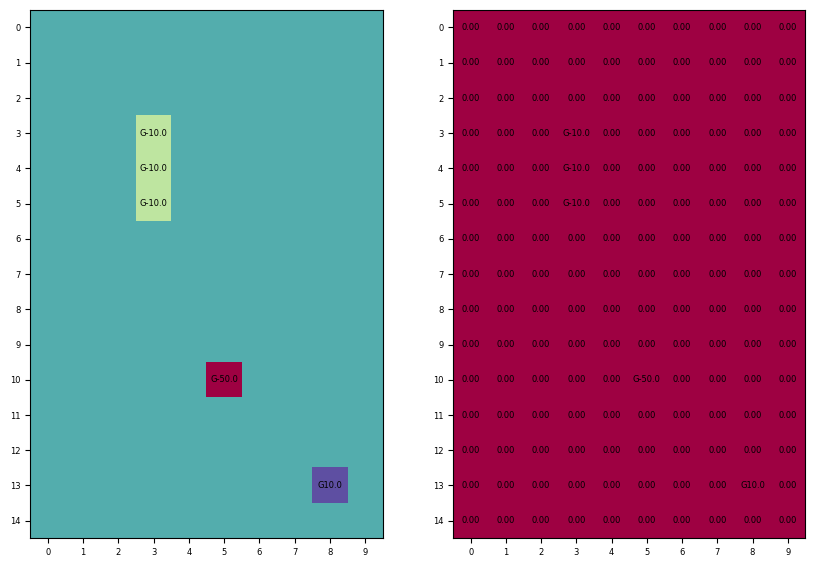

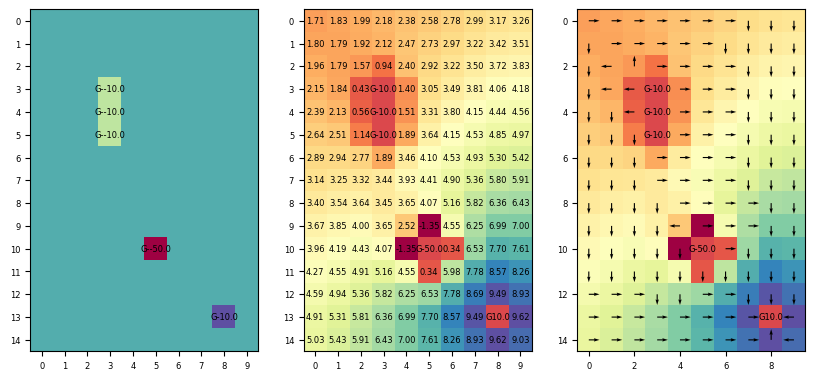

Yes, we converge w.r.t. our tolerance
Distance between V_50(S) and V_51(S) is: 0.0009083845710093224



p =  0.7000000000000001


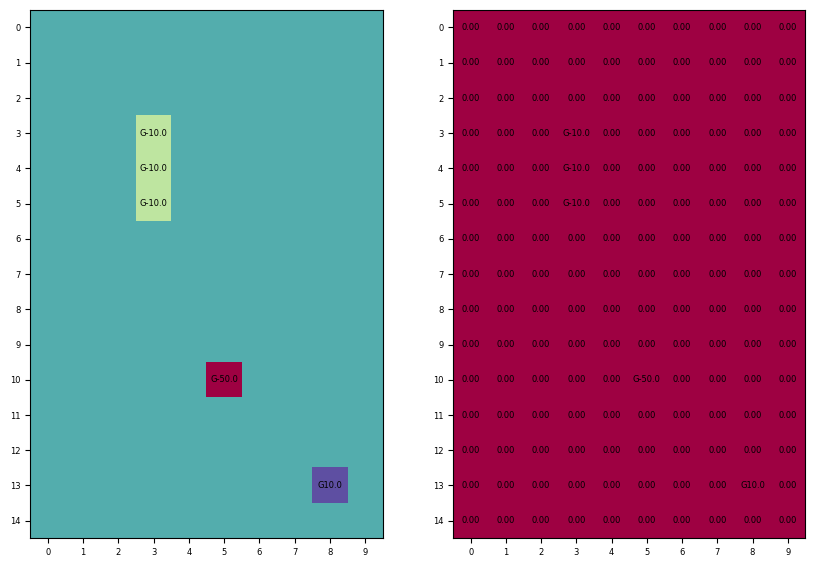

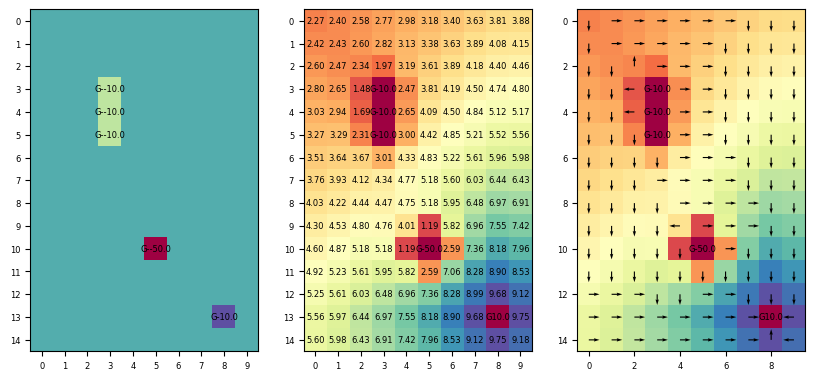

Yes, we converge w.r.t. our tolerance
Distance between V_42(S) and V_43(S) is: 0.0009561375552227695



p =  0.8


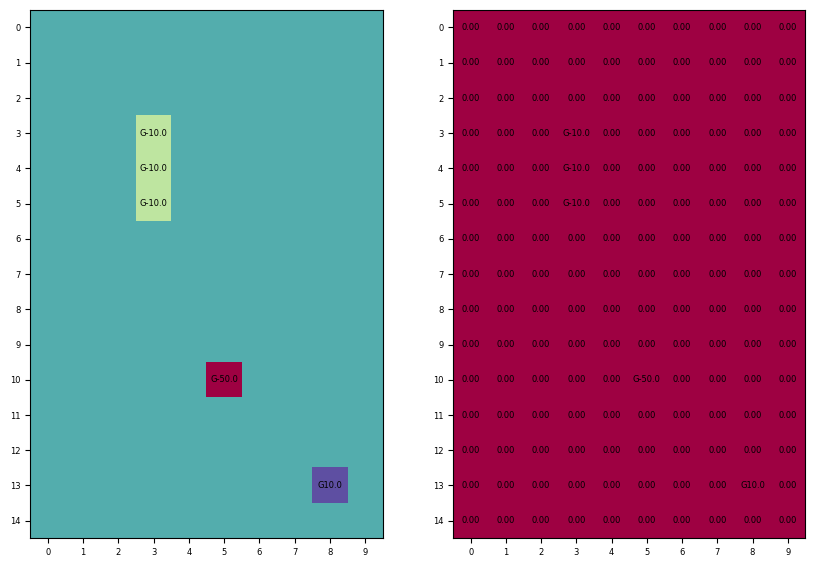

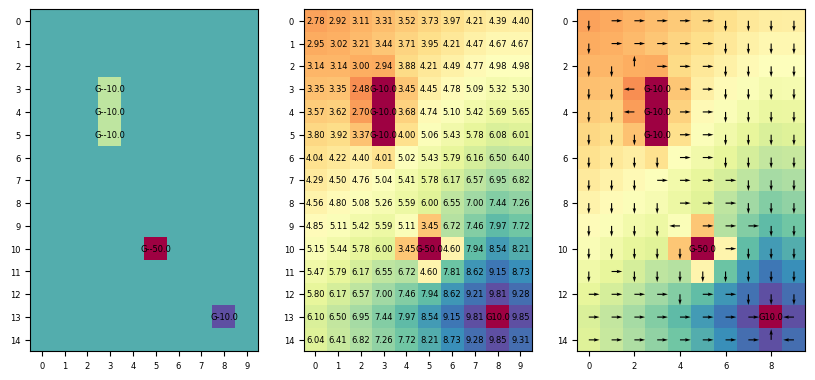

Yes, we converge w.r.t. our tolerance
Distance between V_36(S) and V_37(S) is: 0.0007863518805848697



p =  0.9


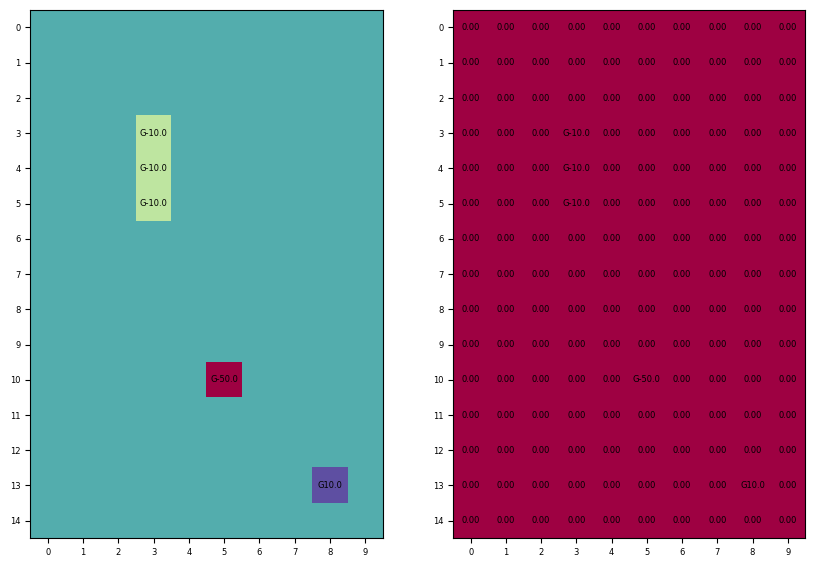

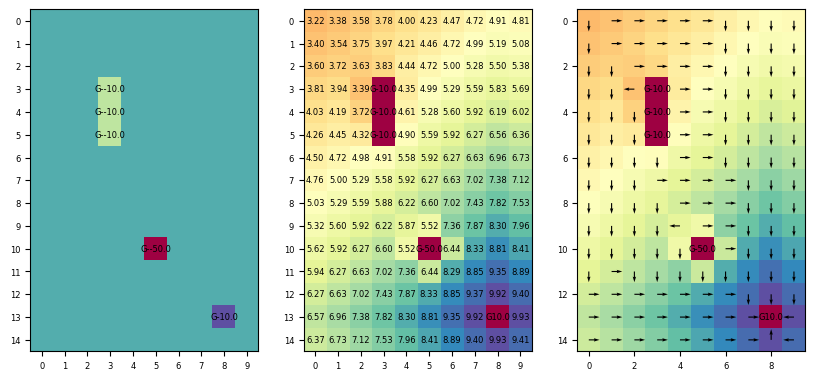

Yes, we converge w.r.t. our tolerance
Distance between V_30(S) and V_31(S) is: 0.000685538945736663



p =  1.0


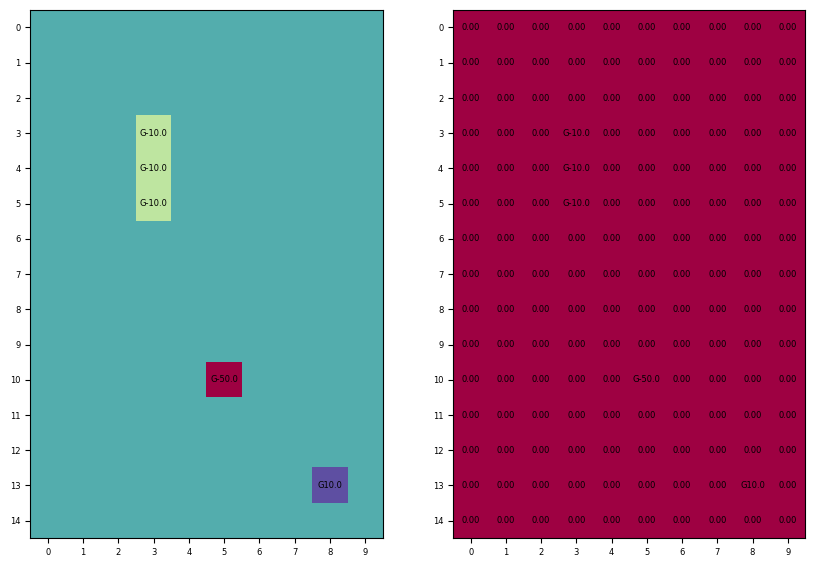

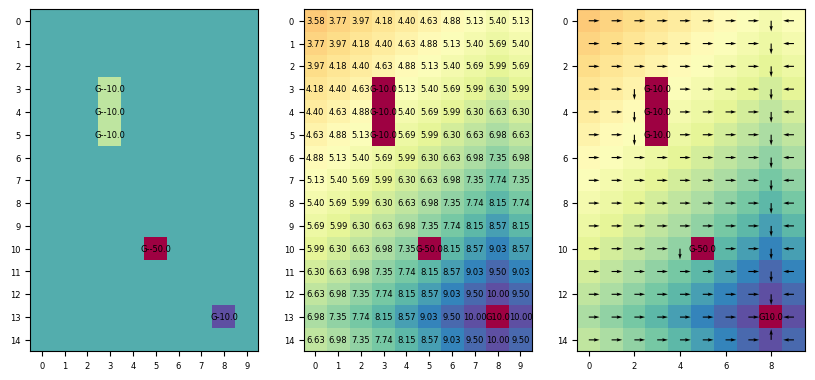

Yes, we converge w.r.t. our tolerance
Distance between V_21(S) and V_22(S) is: 0.0





In [ ]:
for num in range(1, 11):

    print("p = ", 0.1*num)
    # Build the world (and initial values)
    World = PY_GW_VI_tools.new_world(Lx=Lx, Ly=Ly, Nblocks=Nblocks, goal=goal, rewards=rewards_list)
    Values = np.zeros((Ly,Lx))

    # Solve and plot
    PY_GW_VI_plot.plot_world_values(World=World, Values=Values)
    World, NewValues, Policy, result_info, num_iter = PY_GW_VI_tools.solve_grid_world(
        World = World,
        initial_values = Values,
        max_n_of_iterations = max_n_of_iterations,
        gamma = gamma,
        tolerance = tolerance,
        possible_actions = Actions,
        p = 0.1*num,
        random_flag=random_flag)
    PY_GW_VI_plot.plot_world_values_policy(World=World, Values=NewValues, Policy=Policy)
    print( PY_GW_VI_tools.get_info_about_result(result_info = result_info) )

    print("\n\n")

Here one can observe a very curious behaviour that, actually, makes perfectly sense. Having a value of `gamma` very high, the agent is aware of the goal-cells in its surroundings and will aim to reach the one that carries the higher reward. However, if we set a low value of `p` the probability to take a wrong action is very high and, being very near to a goal-cell that is not its target, the probability to "fall" into that one is high. Therefore, with low `p` the optimal solution is to take a longer path but in such a way that the agent will not be in the very surroundings of the non-optimal goal-cells, with the fear to fall into one of them.

With an increasing value of `p` also the confidence of the agent increases, so it will tend to take paths that, assuring a lower amount of steps, may also pass in the vicinity of other goal-cells.

Another interesting thing to do may be to also change the value of `gamma`.